In [1]:
##Importing  necessary libraries:--

import numpy as np , pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import missingno as mno

In [2]:
##Load the dataset

df= pd.read_csv('application_data.csv')
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
##Checking Structure of Data:---
df.info(verbose = True,show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

In [4]:
df.shape

(307511, 122)

In [5]:
##Checking Column Details:-
df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [6]:
len(df)

307511

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [8]:
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [9]:
#Cleaning the missing data:---
# finding Null Values:

df.isnull().sum().sort_values(ascending=False)

COMMONAREA_MEDI             214865
COMMONAREA_AVG              214865
COMMONAREA_MODE             214865
NONLIVINGAPARTMENTS_MODE    213514
NONLIVINGAPARTMENTS_AVG     213514
                             ...  
NAME_HOUSING_TYPE                0
NAME_FAMILY_STATUS               0
NAME_EDUCATION_TYPE              0
NAME_INCOME_TYPE                 0
SK_ID_CURR                       0
Length: 122, dtype: int64

In [10]:
#more than or equal to 40% NULL values:-
### if a column contains more than 40% of its null values,delete that column

Percentage_of_null=(df.isnull().sum()/len(df)*100).sort_values(ascending = False).head(60)
Percentage_of_null

COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAPARTMENTS_MEDI           68.354953
FLOORSMIN_AVG                   67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_MEDI                  67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_MODE                66.497784
YEARS_BUILD_AVG                 66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MEDI                   59.376738
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

In [11]:
#Removing columns with > 40% of null values

drop_null=Percentage_of_null[Percentage_of_null>=40]
drop_null

COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAPARTMENTS_MEDI           68.354953
FLOORSMIN_AVG                   67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_MEDI                  67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_MODE                66.497784
YEARS_BUILD_AVG                 66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MEDI                   59.376738
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

In [12]:
##dropping the above columns

df1=df.drop(columns=drop_null.index)
df1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
Percentage_of_null=(df1.isnull().sum()/len(df1)*100).sort_values(ascending = False).head(30)
Percentage_of_null

OCCUPATION_TYPE               31.345545
EXT_SOURCE_3                  19.825307
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
NAME_TYPE_SUITE                0.420148
OBS_30_CNT_SOCIAL_CIRCLE       0.332021
DEF_30_CNT_SOCIAL_CIRCLE       0.332021
OBS_60_CNT_SOCIAL_CIRCLE       0.332021
DEF_60_CNT_SOCIAL_CIRCLE       0.332021
EXT_SOURCE_2                   0.214626
AMT_GOODS_PRICE                0.090403
AMT_ANNUITY                    0.003902
CNT_FAM_MEMBERS                0.000650
DAYS_LAST_PHONE_CHANGE         0.000325
FLAG_DOCUMENT_17               0.000000
FLAG_DOCUMENT_18               0.000000
FLAG_DOCUMENT_21               0.000000
FLAG_DOCUMENT_20               0.000000
FLAG_DOCUMENT_19               0.000000
FLAG_DOCUMENT_2                0.000000
FLAG_DOCUMENT_3                0.000000


In [14]:
df1.shape

(307511, 73)

In [15]:
##Now we have 73 columns:-
##Examine the following columns with empty values <31 :-

#OCCUPATION_TYPE               31.345545
#EXT_SOURCE_3                  19.825307
#AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
#AMT_REQ_CREDIT_BUREAU_QRT     13.501631
#AMT_REQ_CREDIT_BUREAU_MON     13.501631
#AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
#AMT_REQ_CREDIT_BUREAU_DAY     13.501631
#AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
#NAME_TYPE_SUITE                0.420148
#OBS_30_CNT_SOCIAL_CIRCLE       0.332021
#DEF_30_CNT_SOCIAL_CIRCLE       0.332021
#OBS_60_CNT_SOCIAL_CIRCLE       0.332021
#DEF_60_CNT_SOCIAL_CIRCLE       0.332021
#EXT_SOURCE_2                   0.214626
#AMT_GOODS_PRICE                0.090403
#AMT_ANNUITY                    0.003902
#CNT_FAM_MEMBERS                0.000650
#DAYS_LAST_PHONE_CHANGE         0.000325

In [16]:
##OCCUPATION_TYPE column analysis:-
df1['OCCUPATION_TYPE'].value_counts().head()

Laborers       55186
Sales staff    32102
Core staff     27570
Managers       21371
Drivers        18603
Name: OCCUPATION_TYPE, dtype: int64

In [17]:
df1['OCCUPATION_TYPE'].describe()

count       211120
unique          18
top       Laborers
freq         55186
Name: OCCUPATION_TYPE, dtype: object

In [18]:
df1['OCCUPATION_TYPE'].fillna(value = 'OCCUPATION_TYPE', inplace = True)

In [19]:
df1['OCCUPATION_TYPE'].isna().sum()

0

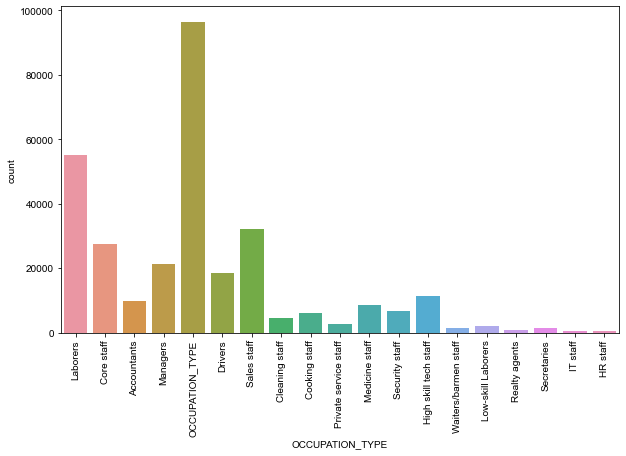

In [20]:
plt.figure(figsize = (10,6))
sns.countplot(x= 'OCCUPATION_TYPE', data=df1)
plt.xticks(rotation=90)
#plt.style.use('dark_background')
sns.set_style('whitegrid')
plt.show()

In [21]:
Percentage_of_null=(df1.isnull().sum()/len(df1)*100).sort_values(ascending = False).head(30)
Percentage_of_null

EXT_SOURCE_3                  19.825307
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
NAME_TYPE_SUITE                0.420148
DEF_60_CNT_SOCIAL_CIRCLE       0.332021
OBS_30_CNT_SOCIAL_CIRCLE       0.332021
DEF_30_CNT_SOCIAL_CIRCLE       0.332021
OBS_60_CNT_SOCIAL_CIRCLE       0.332021
EXT_SOURCE_2                   0.214626
AMT_GOODS_PRICE                0.090403
AMT_ANNUITY                    0.003902
CNT_FAM_MEMBERS                0.000650
DAYS_LAST_PHONE_CHANGE         0.000325
FLAG_DOCUMENT_18               0.000000
FLAG_DOCUMENT_5                0.000000
FLAG_DOCUMENT_21               0.000000
FLAG_DOCUMENT_20               0.000000
FLAG_DOCUMENT_19               0.000000
FLAG_DOCUMENT_2                0.000000
FLAG_DOCUMENT_3                0.000000
FLAG_DOCUMENT_4                0.000000


In [22]:
#Analise EXT_SOURCE_3   

df1['EXT_SOURCE_3'].value_counts().head()

0.746300    1460
0.713631    1315
0.694093    1276
0.670652    1191
0.652897    1154
Name: EXT_SOURCE_3, dtype: int64

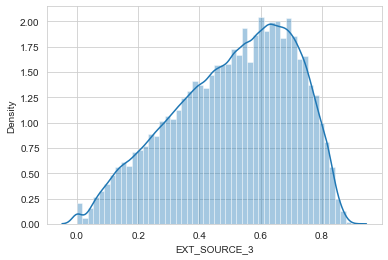

In [23]:
sns.distplot(df1['EXT_SOURCE_3'])
plt.show()

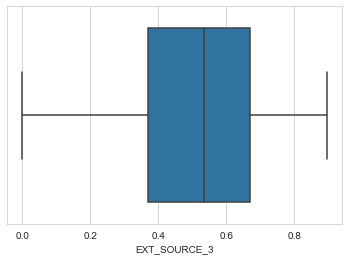

In [24]:
sns.boxplot(df1.EXT_SOURCE_3)
plt.show()

In [25]:
df1['EXT_SOURCE_3'].describe()

count    246546.000000
mean          0.510853
std           0.194844
min           0.000527
25%           0.370650
50%           0.535276
75%           0.669057
max           0.896010
Name: EXT_SOURCE_3, dtype: float64

In [26]:
df1['EXT_SOURCE_3'].mode()

0    0.7463
Name: EXT_SOURCE_3, dtype: float64

In [27]:
df1['EXT_SOURCE_3'].median()

0.5352762504724826

In [28]:
#This data has a skewed distribution.will leave as it is.

In [29]:
#Now will Analise below columns:-
#AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
#AMT_REQ_CREDIT_BUREAU_QRT     13.501631
#AMT_REQ_CREDIT_BUREAU_MON     13.501631
#AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
#AMT_REQ_CREDIT_BUREAU_DAY     13.501631
#AMT_REQ_CREDIT_BUREAU_HOUR    13.501631

In [30]:
df1[['AMT_REQ_CREDIT_BUREAU_YEAR',
    'AMT_REQ_CREDIT_BUREAU_QRT',
    'AMT_REQ_CREDIT_BUREAU_MON',
    'AMT_REQ_CREDIT_BUREAU_WEEK',
    'AMT_REQ_CREDIT_BUREAU_DAY',
    'AMT_REQ_CREDIT_BUREAU_HOUR']].describe()

,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR
count,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,1.899974,0.265474,0.267395,0.034362,0.007000,0.006402
std,1.869295,0.794056,0.916002,0.204685,0.110757,0.083849
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,25.000000,261.000000,27.000000,8.000000,9.000000,4.000000


In [31]:
df1[['AMT_REQ_CREDIT_BUREAU_YEAR',
    'AMT_REQ_CREDIT_BUREAU_QRT',
    'AMT_REQ_CREDIT_BUREAU_MON',
    'AMT_REQ_CREDIT_BUREAU_WEEK',
    'AMT_REQ_CREDIT_BUREAU_DAY',
    'AMT_REQ_CREDIT_BUREAU_HOUR']].mode()

,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR
0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
df1[['AMT_REQ_CREDIT_BUREAU_YEAR',
    'AMT_REQ_CREDIT_BUREAU_QRT',
    'AMT_REQ_CREDIT_BUREAU_MON',
    'AMT_REQ_CREDIT_BUREAU_WEEK',
    'AMT_REQ_CREDIT_BUREAU_DAY',
    'AMT_REQ_CREDIT_BUREAU_HOUR']].median()

AMT_REQ_CREDIT_BUREAU_YEAR    1.0
AMT_REQ_CREDIT_BUREAU_QRT     0.0
AMT_REQ_CREDIT_BUREAU_MON     0.0
AMT_REQ_CREDIT_BUREAU_WEEK    0.0
AMT_REQ_CREDIT_BUREAU_DAY     0.0
AMT_REQ_CREDIT_BUREAU_HOUR    0.0
dtype: float64

In [33]:
#will keep as it is,will not impute as nullable values are higher (13.50%)

In [34]:
# Now will check the below columns:---

#NAME_TYPE_SUITE                0.420148
#OBS_30_CNT_SOCIAL_CIRCLE       0.332021
#DEF_30_CNT_SOCIAL_CIRCLE       0.332021
#OBS_60_CNT_SOCIAL_CIRCLE       0.332021
#DEF_60_CNT_SOCIAL_CIRCLE       0.332021
#EXT_SOURCE_2                   0.214626
#AMT_GOODS_PRICE                0.090403
#AMT_ANNUITY                    0.003902
#CNT_FAM_MEMBERS                0.000650
#DAYS_LAST_PHONE_CHANGE         0.000325

In [35]:
#Analysis of NAME_TYPE_SUITE column
#nullable values = 0.42%
df1['NAME_TYPE_SUITE'].value_counts().head()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Name: NAME_TYPE_SUITE, dtype: int64

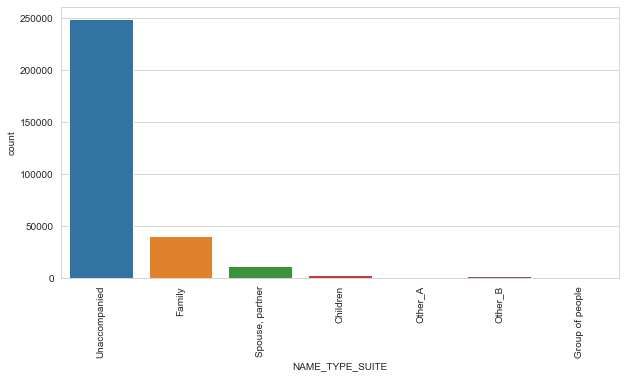

In [36]:
plt.figure(figsize = (10,5))
sns.countplot(data = df1, x = "NAME_TYPE_SUITE")
plt.xticks(rotation = 90)
sns.set_style('whitegrid')
plt.show()
#We can impute it

In [37]:
df1['NAME_TYPE_SUITE'].fillna(value = 'NAME_TYPE_SUITE', inplace = True)


In [38]:
df['NAME_TYPE_SUITE'].describe()

count            306219
unique                7
top       Unaccompanied
freq             248526
Name: NAME_TYPE_SUITE, dtype: object

In [39]:
df1['NAME_TYPE_SUITE'].isna().sum()


0

In [40]:
#Analysis of OBS_30_CNT_SOCIAL_CIRCLE column
#nullable values = 0.33%

df1.OBS_30_CNT_SOCIAL_CIRCLE.value_counts().head()

0.0    163910
1.0     48783
2.0     29808
3.0     20322
4.0     14143
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: int64

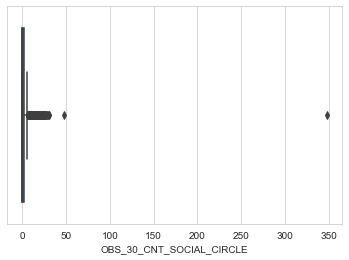

In [41]:
sns.boxplot(df1.OBS_30_CNT_SOCIAL_CIRCLE)
plt.show()

In [42]:
df1.OBS_30_CNT_SOCIAL_CIRCLE.describe()

count    306490.000000
mean          1.422245
std           2.400989
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         348.000000
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64

In [43]:
df1.OBS_30_CNT_SOCIAL_CIRCLE.mode()[0]

0.0

In [44]:
df1.OBS_30_CNT_SOCIAL_CIRCLE.median()

0.0

In [45]:
df1.OBS_30_CNT_SOCIAL_CIRCLE.quantile(q = [0.25,0.5,0.75,1])

0.25      0.0
0.50      0.0
0.75      2.0
1.00    348.0
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64

In [46]:
#We can Impute it
df1['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(value = 'OBS_30_CNT_SOCIAL_CIRCLE', inplace = True)

In [47]:
df1['OBS_30_CNT_SOCIAL_CIRCLE'].isna().sum()


0

In [48]:
#Analysis of OBS_30_CNT_SOCIAL_CIRCLE column
#nullable values = 0.33%
df1.DEF_30_CNT_SOCIAL_CIRCLE.describe()

count    306490.000000
mean          0.143421
std           0.446698
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          34.000000
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64

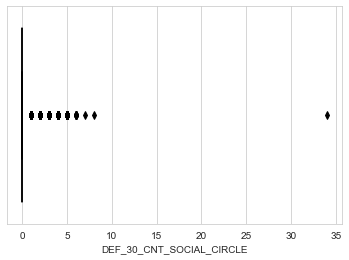

In [49]:
sns.boxplot(df1.DEF_30_CNT_SOCIAL_CIRCLE,color='Black')
plt.show()

In [50]:
df1.DEF_30_CNT_SOCIAL_CIRCLE.mode()

0    0.0
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64

In [51]:
df1.DEF_30_CNT_SOCIAL_CIRCLE.median()

0.0

In [52]:
df1.DEF_30_CNT_SOCIAL_CIRCLE.quantile(q = [0.25,0.5,0.75,0.99,1])

0.25     0.0
0.50     0.0
0.75     0.0
0.99     2.0
1.00    34.0
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64

In [53]:
df1['DEF_30_CNT_SOCIAL_CIRCLE'].fillna(value = 'DEF_30_CNT_SOCIAL_CIRCLE', inplace = True)


In [54]:
df1['DEF_30_CNT_SOCIAL_CIRCLE'].isna().sum()

0

In [55]:
#Analysis of OBS_60_CNT_SOCIAL_CIRCLE column
#nullable values = 0.33%

df1.OBS_60_CNT_SOCIAL_CIRCLE.value_counts().head()

0.0    164666
1.0     48870
2.0     29766
3.0     20215
4.0     13946
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: int64

In [56]:
df1.OBS_60_CNT_SOCIAL_CIRCLE.describe()

count    306490.000000
mean          1.405292
std           2.379803
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         344.000000
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64

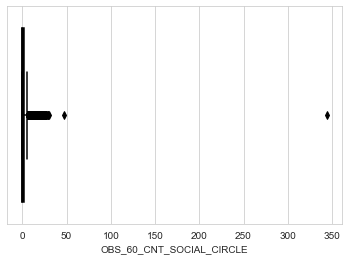

In [57]:
sns.boxplot(df1.OBS_60_CNT_SOCIAL_CIRCLE,color='black')
plt.show()

In [58]:
df1.OBS_60_CNT_SOCIAL_CIRCLE.median()

0.0

In [59]:
df1.OBS_60_CNT_SOCIAL_CIRCLE.mode()

0    0.0
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64

In [60]:
df1.OBS_60_CNT_SOCIAL_CIRCLE.quantile(q = [0.25,0.5,0.75,0.99,1])

0.25      0.0
0.50      0.0
0.75      2.0
0.99     10.0
1.00    344.0
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64

In [61]:
#We can Impute it
df1['OBS_60_CNT_SOCIAL_CIRCLE'].fillna(value = 'OBS_60_CNT_SOCIAL_CIRCLE', inplace = True)

In [62]:
df1['OBS_60_CNT_SOCIAL_CIRCLE'].isna().sum()

0

In [63]:
df1.isnull().head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [64]:
df1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [65]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              307511 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [66]:
#Analysis of DEF_60_CNT_SOCIAL_CIRCLE column
#DEF_60_CNT_SOCIAL_CIRCLE= 0.33%

In [67]:
df1.DEF_60_CNT_SOCIAL_CIRCLE.describe()

count    306490.000000
mean          0.100049
std           0.362291
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          24.000000
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: float64

In [68]:
df1.DEF_60_CNT_SOCIAL_CIRCLE.mode()[0]

0.0

In [69]:
df1.DEF_60_CNT_SOCIAL_CIRCLE.median()

0.0

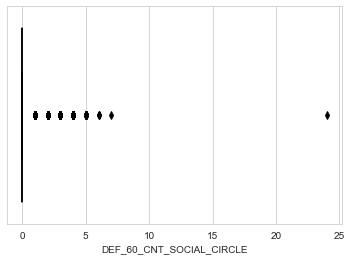

In [70]:
sns.boxplot(df1.DEF_60_CNT_SOCIAL_CIRCLE,color='black')
plt.show()

In [71]:
df1.DEF_60_CNT_SOCIAL_CIRCLE.fillna(df1.DEF_60_CNT_SOCIAL_CIRCLE.mode()[0],inplace=True)

In [72]:
df1['DEF_60_CNT_SOCIAL_CIRCLE'].isna().sum()

0

In [73]:
df1.isnull().sum().sort_values(ascending=False).head()

EXT_SOURCE_3                  60965
AMT_REQ_CREDIT_BUREAU_YEAR    41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
dtype: int64

In [74]:
##Analysis of EXT_SOURCE_2 column
##nullable values = 0.21%

In [75]:
df1.EXT_SOURCE_2.describe()

count    3.068510e+05
mean     5.143927e-01
std      1.910602e-01
min      8.173617e-08
25%      3.924574e-01
50%      5.659614e-01
75%      6.636171e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64

In [76]:
df1.EXT_SOURCE_2.mode()[0]

0.2858978721410488

In [77]:
df1.EXT_SOURCE_2.median()

0.5659614260608526

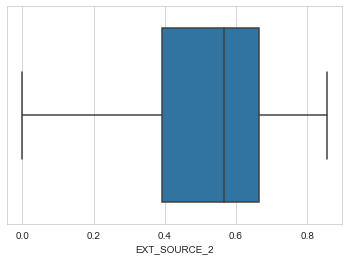

In [78]:
sns.boxplot(df1.EXT_SOURCE_2)
plt.show()

In [79]:
df1.EXT_SOURCE_2.fillna(df1.EXT_SOURCE_2.mode()[0],inplace=True)

In [80]:
df1['EXT_SOURCE_2'].isna().sum()

0

In [81]:
#Analysis of AMT_GOODS_PRICE column
#nullable values = 0.09%

In [82]:
df1.AMT_GOODS_PRICE.describe()

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

In [83]:
df1.AMT_GOODS_PRICE.median()


450000.0

In [84]:
df1.AMT_GOODS_PRICE.mode()[0]

450000.0

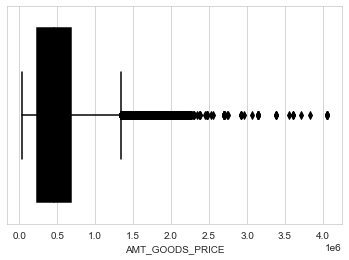

In [85]:
sns.boxplot(df1.AMT_GOODS_PRICE,color='black')
plt.show()

In [86]:
#We can Impute it
df1.AMT_GOODS_PRICE.fillna(df1.AMT_GOODS_PRICE.mode()[0],inplace=True)

In [87]:
df1['AMT_GOODS_PRICE'].isna().sum()

0

In [88]:
Percentage_of_null=(df1.isnull().sum()/len(df1)*100).sort_values(ascending = False).head(30)
Percentage_of_null

EXT_SOURCE_3                  19.825307
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
AMT_ANNUITY                    0.003902
CNT_FAM_MEMBERS                0.000650
DAYS_LAST_PHONE_CHANGE         0.000325
FLAG_DOCUMENT_5                0.000000
FLAG_DOCUMENT_4                0.000000
FLAG_DOCUMENT_3                0.000000
FLAG_DOCUMENT_2                0.000000
OBS_30_CNT_SOCIAL_CIRCLE       0.000000
DEF_60_CNT_SOCIAL_CIRCLE       0.000000
OBS_60_CNT_SOCIAL_CIRCLE       0.000000
DEF_30_CNT_SOCIAL_CIRCLE       0.000000
FLAG_DOCUMENT_7                0.000000
EXT_SOURCE_2                   0.000000
FLAG_DOCUMENT_6                0.000000
FLAG_DOCUMENT_11               0.000000
FLAG_DOCUMENT_8                0.000000
FLAG_DOCUMENT_9                0.000000
FLAG_DOCUMENT_10               0.000000


In [89]:
#df.Embarked.mode()[0]
#df.Embarked.fillna(df.Embarked.mode()[0],inplace=True)
#df1.DEF_60_CNT_SOCIAL_CIRCLE.fillna(df1.DEF_60_CNT_SOCIAL_CIRCLE.mode()[0],inplace=True)
#df.isnull().sum().sort_values(ascending=False)
#df1['DEF_60_CNT_SOCIAL_CIRCLE'].isna().sum()
#Null values Imputed and dropped next will remove unwanted columns:-

In [90]:
df1.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_C

In [91]:
df1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [92]:
unwanted_cols=['FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE','FLAG_EMAIL',
          'REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY', 'FLAG_EMAIL','DAYS_LAST_PHONE_CHANGE',
          'FLAG_DOCUMENT_2','REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION',
          'LIVE_REGION_NOT_WORK_REGION','FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4','FLAG_DOCUMENT_5',
          'FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10',
          'FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14',
          'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18',
          'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']


In [93]:
df1.drop(columns=unwanted_cols, inplace=True)

In [94]:
df1.shape

(307511, 42)

In [95]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 42 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   SK_ID_CURR                  307511 non-null  int64  
 1   TARGET                      307511 non-null  int64  
 2   NAME_CONTRACT_TYPE          307511 non-null  object 
 3   CODE_GENDER                 307511 non-null  object 
 4   FLAG_OWN_CAR                307511 non-null  object 
 5   FLAG_OWN_REALTY             307511 non-null  object 
 6   CNT_CHILDREN                307511 non-null  int64  
 7   AMT_INCOME_TOTAL            307511 non-null  float64
 8   AMT_CREDIT                  307511 non-null  float64
 9   AMT_ANNUITY                 307499 non-null  float64
 10  AMT_GOODS_PRICE             307511 non-null  float64
 11  NAME_TYPE_SUITE             307511 non-null  object 
 12  NAME_INCOME_TYPE            307511 non-null  object 
 13  NAME_EDUCATION

In [96]:
df1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,2.0,0.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [97]:
df1.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.075110e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,3.075110e+05,246546.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383163e+05,0.020868,-16036.995067,63815.045904,...,0.179555,5.139023e-01,0.510853,0.099717,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.692890e+05,0.013831,4363.988632,141275.766519,...,0.383817,1.911477e-01,0.194844,0.361735,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,8.173617e-08,0.000527,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,3.907824e-01,0.370650,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,5.654672e-01,0.535276,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,6.634218e-01,0.669057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,8.549997e-01,0.896010,24.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [98]:
## Will devide into two part Structurewaise 
##1-Categorical columns
##2-Numerical cols
list(set(df1.columns) - set(df1.describe().columns))

['FLAG_OWN_REALTY',
 'NAME_EDUCATION_TYPE',
 'NAME_HOUSING_TYPE',
 'ORGANIZATION_TYPE',
 'OCCUPATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_CONTRACT_TYPE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'FLAG_OWN_CAR',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'NAME_TYPE_SUITE',
 'CODE_GENDER',
 'WEEKDAY_APPR_PROCESS_START',
 'NAME_INCOME_TYPE']

In [99]:
# Numerical cols
df1.describe().columns

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'CNT_FAM_MEMBERS',
       'HOUR_APPR_PROCESS_START', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')

In [100]:
df1.nunique().sort_values()

LIVE_CITY_NOT_WORK_CITY            2
REG_CITY_NOT_WORK_CITY             2
FLAG_MOBIL                         2
FLAG_OWN_REALTY                    2
REG_CITY_NOT_LIVE_CITY             2
NAME_CONTRACT_TYPE                 2
TARGET                             2
FLAG_OWN_CAR                       2
CODE_GENDER                        3
AMT_REQ_CREDIT_BUREAU_HOUR         5
NAME_EDUCATION_TYPE                5
NAME_HOUSING_TYPE                  6
NAME_FAMILY_STATUS                 6
WEEKDAY_APPR_PROCESS_START         7
NAME_TYPE_SUITE                    8
NAME_INCOME_TYPE                   8
AMT_REQ_CREDIT_BUREAU_DAY          9
AMT_REQ_CREDIT_BUREAU_WEEK         9
DEF_60_CNT_SOCIAL_CIRCLE           9
AMT_REQ_CREDIT_BUREAU_QRT         11
DEF_30_CNT_SOCIAL_CIRCLE          11
CNT_CHILDREN                      15
CNT_FAM_MEMBERS                   17
OCCUPATION_TYPE                   19
AMT_REQ_CREDIT_BUREAU_MON         24
HOUR_APPR_PROCESS_START           24
AMT_REQ_CREDIT_BUREAU_YEAR        25
O

In [101]:
df1_numeric=df1.describe().columns
df1_numeric

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'CNT_FAM_MEMBERS',
       'HOUR_APPR_PROCESS_START', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')

In [102]:
df1.nunique().sort_values().index

Index(['LIVE_CITY_NOT_WORK_CITY', 'REG_CITY_NOT_WORK_CITY', 'FLAG_MOBIL',
       'FLAG_OWN_REALTY', 'REG_CITY_NOT_LIVE_CITY', 'NAME_CONTRACT_TYPE',
       'TARGET', 'FLAG_OWN_CAR', 'CODE_GENDER', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'NAME_EDUCATION_TYPE', 'NAME_HOUSING_TYPE', 'NAME_FAMILY_STATUS',
       'WEEKDAY_APPR_PROCESS_START', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'CNT_CHILDREN', 'CNT_FAM_MEMBERS',
       'OCCUPATION_TYPE', 'AMT_REQ_CREDIT_BUREAU_MON',
       'HOUR_APPR_PROCESS_START', 'AMT_REQ_CREDIT_BUREAU_YEAR',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'ORGANIZATION_TYPE', 'REGION_POPULATION_RELATIVE', 'EXT_SOURCE_3',
       'AMT_GOODS_PRICE', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'DAYS_ID_PUBLISH',
       'DAYS_EMPLOYED', 'AMT_ANNUITY', 'DAYS_REGISTRATION', 'DAYS_BIRTH',
       'EXT_SOUR

In [103]:
cat= ['FLAG_MOBIL', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
     'FLAG_OWN_REALTY', 'REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY',
     'REG_CITY_NOT_LIVE_CITY','AMT_REQ_CREDIT_BUREAU_HOUR', 'NAME_EDUCATION_TYPE',
     'NAME_HOUSING_TYPE', 'NAME_FAMILY_STATUS', 'WEEKDAY_APPR_PROCESS_START',
     'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'AMT_REQ_CREDIT_BUREAU_DAY',
     'AMT_REQ_CREDIT_BUREAU_WEEK', 'DEF_60_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE',
     'AMT_REQ_CREDIT_BUREAU_QRT', 'CNT_CHILDREN','CNT_FAM_MEMBERS','OCCUPATION_TYPE',
     'HOUR_APPR_PROCESS_START','AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_YEAR',
     'OBS_60_CNT_SOCIAL_CIRCLE','OBS_30_CNT_SOCIAL_CIRCLE','ORGANIZATION_TYPE']

<function matplotlib.pyplot.show(close=None, block=None)>

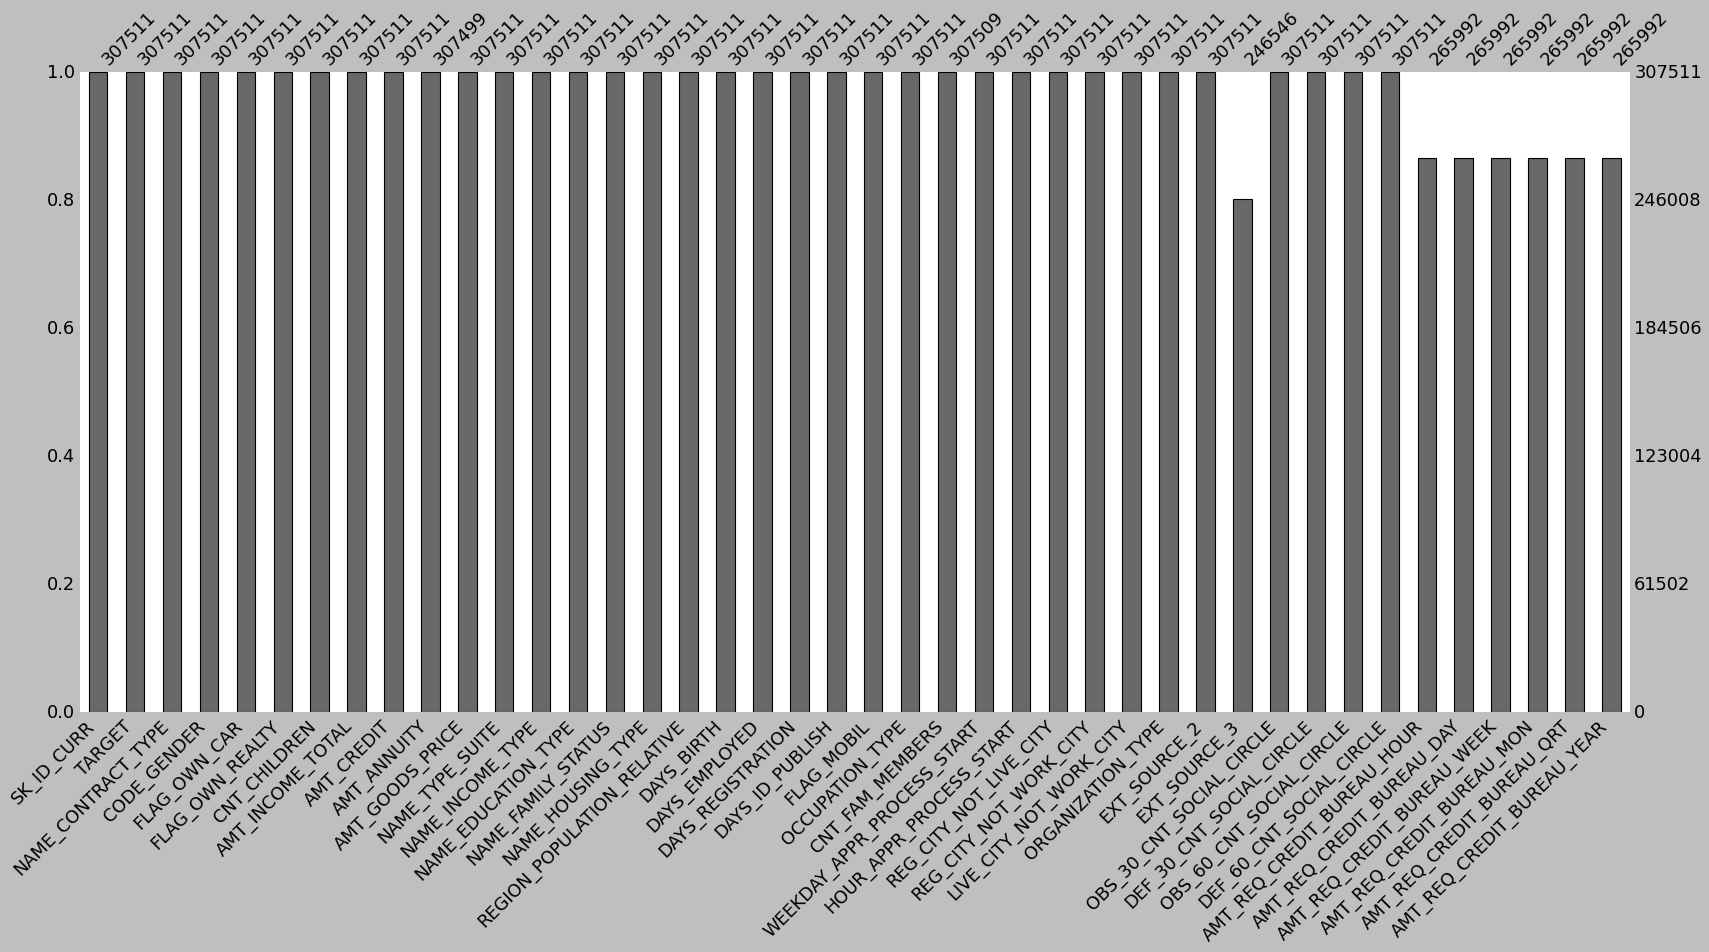

In [104]:
plt.style.use('classic')
mno.bar(df1)
plt.show

In [105]:
#We have some(negative) values:- 
df1[['DAYS_BIRTH' ,'DAYS_EMPLOYED' ,'DAYS_REGISTRATION' ,'DAYS_ID_PUBLISH']]

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH
0,-9461,-637,-3648.0,-2120
1,-16765,-1188,-1186.0,-291
2,-19046,-225,-4260.0,-2531
3,-19005,-3039,-9833.0,-2437
4,-19932,-3038,-4311.0,-3458
...,...,...,...,...
307506,-9327,-236,-8456.0,-1982
307507,-20775,365243,-4388.0,-4090
307508,-14966,-7921,-6737.0,-5150
307509,-11961,-4786,-2562.0,-931


In [106]:
Convert_negative_to_positive = ['DAYS_BIRTH' ,'DAYS_EMPLOYED' ,'DAYS_REGISTRATION' ,'DAYS_ID_PUBLISH']
df1[Convert_negative_to_positive] = df1[Convert_negative_to_positive].abs()

In [107]:
df1[['DAYS_BIRTH' ,'DAYS_EMPLOYED' ,'DAYS_REGISTRATION' ,'DAYS_ID_PUBLISH']]

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH
0,9461,637,3648.0,2120
1,16765,1188,1186.0,291
2,19046,225,4260.0,2531
3,19005,3039,9833.0,2437
4,19932,3038,4311.0,3458
...,...,...,...,...
307506,9327,236,8456.0,1982
307507,20775,365243,4388.0,4090
307508,14966,7921,6737.0,5150
307509,11961,4786,2562.0,931


In [108]:
df1[Convert_negative_to_positive].describe()

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH
count,307511.000000,307511.000000,307511.000000,307511.000000
mean,16036.995067,67724.742149,4986.120328,2994.202373
std,4363.988632,139443.751806,3522.886321,1509.450419
min,7489.000000,0.000000,0.000000,0.000000
25%,12413.000000,933.000000,2010.000000,1720.000000
50%,15750.000000,2219.000000,4504.000000,3254.000000
75%,19682.000000,5707.000000,7479.500000,4299.000000
max,25229.000000,365243.000000,24672.000000,7197.000000


In [109]:
df1[Convert_negative_to_positive]= df1[Convert_negative_to_positive]/365

In [110]:
df1[Convert_negative_to_positive].describe()

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH
count,307511.000000,307511.000000,307511.000000,307511.000000
mean,43.936973,185.547239,13.660604,8.203294
std,11.956133,382.037676,9.651743,4.135481
min,20.517808,0.000000,0.000000,0.000000
25%,34.008219,2.556164,5.506849,4.712329
50%,43.150685,6.079452,12.339726,8.915068
75%,53.923288,15.635616,20.491781,11.778082
max,69.120548,1000.665753,67.594521,19.717808


In [111]:
# Analise gendere column
df1['CODE_GENDER'].value_counts()


F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [112]:
df1.loc[df1['CODE_GENDER']=='XNA', 'CODE_GENDER'] = 'F'

In [113]:
df1['CODE_GENDER'].value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

In [114]:
df1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,2.0,0.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [115]:
df1_categorical = df1.select_dtypes(include=['object']).columns
df1_categorical

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE'],
      dtype='object')

In [116]:
##Here Target will be "Y"

In [117]:
df1.TARGET.head()

0    1
1    0
2    0
3    0
4    0
Name: TARGET, dtype: int64

In [118]:
df1.TARGET.value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

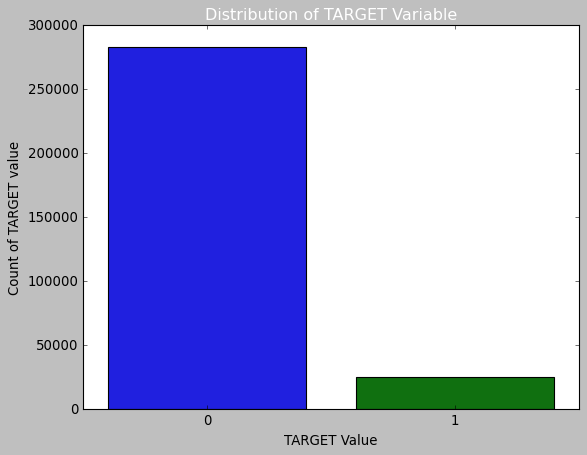

In [119]:
sns.countplot(df1['TARGET'])
plt.xlabel("TARGET Value")
plt.ylabel("Count of TARGET value")
plt.title("Distribution of TARGET Variable",color='white')
plt.show()

In [120]:
# Clients with payment difficulties
(df1['TARGET'] == 1).sum()

24825

In [121]:
# Other Clients
(df1['TARGET'] == 0).sum()

282686

In [122]:
df1.TARGET.value_counts(normalize=True)

0    0.919271
1    0.080729
Name: TARGET, dtype: float64

In [123]:
corr_0 = df1[df1['TARGET'] == 0]
corr_1 = df1[df1['TARGET'] == 1]

In [124]:
#ratio of appli_data_target0 : appli_data_target1
ratio =corr_0.shape[0]/corr_1.shape[0]
ratio

11.387150050352467

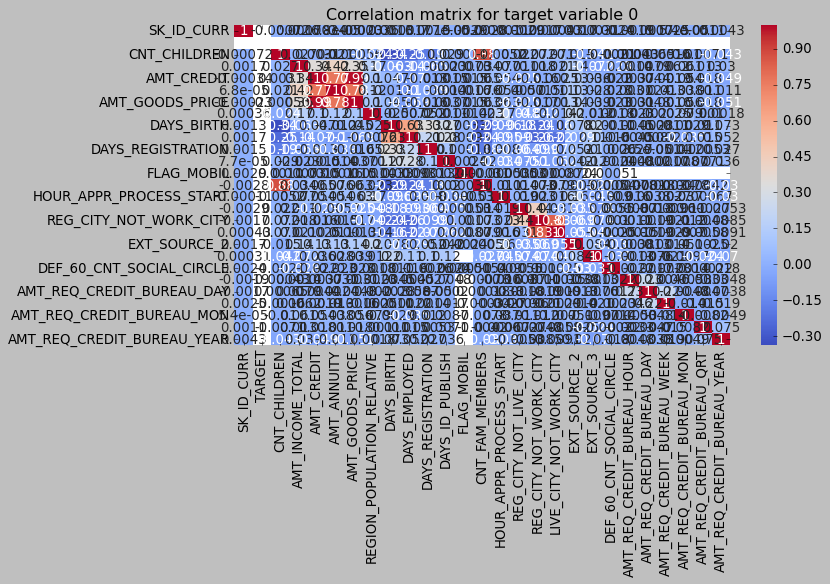

In [125]:
#correlation between different variables for both dataframes with target=1 and target=0
plt.figure(figsize=(10,5)) 
sns.heatmap(corr_0.corr(), annot=True, cmap="coolwarm")
plt.title('Correlation matrix for target variable 0')
plt.show()

In [126]:
#Finding the top10 correlation
corr0 = corr_0.corr()
corr0

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,1.000000,NaN,-0.000716,0.001739,-0.000342,0.000068,-0.000235,0.000360,0.001346,0.001744,...,0.000428,0.001680,0.000309,0.002375,-0.001879,-0.001725,0.002524,0.000054,0.001148,0.004349
TARGET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CNT_CHILDREN,-0.000716,NaN,1.000000,0.027397,0.003081,0.020905,-0.000559,-0.024363,-0.336966,-0.245174,...,0.070988,-0.015411,-0.041729,-0.002125,-0.000432,0.000648,-0.001632,-0.010455,-0.007087,-0.042547
AMT_INCOME_TOTAL,0.001739,NaN,0.027397,1.000000,0.342799,0.418953,0.349426,0.167851,-0.062609,-0.140392,...,0.020684,0.139817,-0.072401,-0.027897,0.001417,0.007862,0.006234,0.061470,0.013128,0.029536
AMT_CREDIT,-0.000342,NaN,0.003081,0.342799,1.000000,0.771309,0.987022,0.100604,0.047378,-0.070104,...,0.002506,0.129689,0.036085,-0.021859,-0.003734,0.004409,-0.001883,0.054071,0.017767,-0.048866
AMT_ANNUITY,0.000068,NaN,0.020905,0.418953,0.771309,1.000000,0.776433,0.120988,-0.012263,-0.104978,...,0.010582,0.127101,0.028051,-0.023053,0.003148,0.002392,0.012681,0.038181,0.011248,-0.010882
AMT_GOODS_PRICE,-0.000235,NaN,-0.000559,0.349426,0.987022,0.776433,1.000000,0.103826,0.044650,-0.068527,...,0.001285,0.136222,0.038932,-0.022910,-0.003110,0.004835,-0.001578,0.055880,0.018177,-0.051206
REGION_POPULATION_RELATIVE,0.000360,NaN,-0.024363,0.167851,0.100604,0.120988,0.103826,1.000000,0.025244,-0.007198,...,-0.013502,0.197800,-0.012486,0.001808,-0.002265,0.001969,-0.002480,0.078629,-0.001013,0.001775
DAYS_BIRTH,0.001346,NaN,-0.336966,-0.062609,0.047378,-0.012263,0.044650,0.025244,1.000000,0.626114,...,-0.160072,0.077562,0.197287,0.001065,-0.004461,-0.002772,0.001069,-0.002855,0.011335,0.072886
DAYS_EMPLOYED,0.001744,NaN,-0.245174,-0.140392,-0.070104,-0.104978,-0.068527,-0.007198,0.626114,1.000000,...,-0.221387,-0.028861,0.111995,0.016398,-0.004460,-0.000874,0.002223,-0.034890,0.015116,0.052169


In [127]:
corr_0.corr().abs()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,1.000000,NaN,0.000716,0.001739,0.000342,0.000068,0.000235,0.000360,0.001346,0.001744,...,0.000428,0.001680,0.000309,0.002375,0.001879,0.001725,0.002524,0.000054,0.001148,0.004349
TARGET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CNT_CHILDREN,0.000716,NaN,1.000000,0.027397,0.003081,0.020905,0.000559,0.024363,0.336966,0.245174,...,0.070988,0.015411,0.041729,0.002125,0.000432,0.000648,0.001632,0.010455,0.007087,0.042547
AMT_INCOME_TOTAL,0.001739,NaN,0.027397,1.000000,0.342799,0.418953,0.349426,0.167851,0.062609,0.140392,...,0.020684,0.139817,0.072401,0.027897,0.001417,0.007862,0.006234,0.061470,0.013128,0.029536
AMT_CREDIT,0.000342,NaN,0.003081,0.342799,1.000000,0.771309,0.987022,0.100604,0.047378,0.070104,...,0.002506,0.129689,0.036085,0.021859,0.003734,0.004409,0.001883,0.054071,0.017767,0.048866
AMT_ANNUITY,0.000068,NaN,0.020905,0.418953,0.771309,1.000000,0.776433,0.120988,0.012263,0.104978,...,0.010582,0.127101,0.028051,0.023053,0.003148,0.002392,0.012681,0.038181,0.011248,0.010882
AMT_GOODS_PRICE,0.000235,NaN,0.000559,0.349426,0.987022,0.776433,1.000000,0.103826,0.044650,0.068527,...,0.001285,0.136222,0.038932,0.022910,0.003110,0.004835,0.001578,0.055880,0.018177,0.051206
REGION_POPULATION_RELATIVE,0.000360,NaN,0.024363,0.167851,0.100604,0.120988,0.103826,1.000000,0.025244,0.007198,...,0.013502,0.197800,0.012486,0.001808,0.002265,0.001969,0.002480,0.078629,0.001013,0.001775
DAYS_BIRTH,0.001346,NaN,0.336966,0.062609,0.047378,0.012263,0.044650,0.025244,1.000000,0.626114,...,0.160072,0.077562,0.197287,0.001065,0.004461,0.002772,0.001069,0.002855,0.011335,0.072886
DAYS_EMPLOYED,0.001744,NaN,0.245174,0.140392,0.070104,0.104978,0.068527,0.007198,0.626114,1.000000,...,0.221387,0.028861,0.111995,0.016398,0.004460,0.000874,0.002223,0.034890,0.015116,0.052169


In [128]:
corr_0.corr().abs().unstack().sort_values()

DAYS_REGISTRATION           AMT_REQ_CREDIT_BUREAU_DAY    0.000035
AMT_REQ_CREDIT_BUREAU_DAY   DAYS_REGISTRATION            0.000035
AMT_REQ_CREDIT_BUREAU_MON   SK_ID_CURR                   0.000054
SK_ID_CURR                  AMT_REQ_CREDIT_BUREAU_MON    0.000054
                            AMT_ANNUITY                  0.000068
                                                           ...   
AMT_REQ_CREDIT_BUREAU_MON   FLAG_MOBIL                        NaN
AMT_REQ_CREDIT_BUREAU_QRT   TARGET                            NaN
                            FLAG_MOBIL                        NaN
AMT_REQ_CREDIT_BUREAU_YEAR  TARGET                            NaN
                            FLAG_MOBIL                        NaN
Length: 729, dtype: float64

In [129]:
correlation_0 = corr_0.corr().abs().unstack().sort_values().dropna()
correlation_0

DAYS_REGISTRATION           AMT_REQ_CREDIT_BUREAU_DAY     0.000035
AMT_REQ_CREDIT_BUREAU_DAY   DAYS_REGISTRATION             0.000035
AMT_REQ_CREDIT_BUREAU_MON   SK_ID_CURR                    0.000054
SK_ID_CURR                  AMT_REQ_CREDIT_BUREAU_MON     0.000054
                            AMT_ANNUITY                   0.000068
                                                            ...   
AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_HOUR    1.000000
AMT_REQ_CREDIT_BUREAU_DAY   AMT_REQ_CREDIT_BUREAU_DAY     1.000000
AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_WEEK    1.000000
CNT_FAM_MEMBERS             CNT_FAM_MEMBERS               1.000000
AMT_REQ_CREDIT_BUREAU_YEAR  AMT_REQ_CREDIT_BUREAU_YEAR    1.000000
Length: 662, dtype: float64

In [130]:
correlation_0 = correlation_0[correlation_0 != 1.0]
correlation_0

DAYS_REGISTRATION          AMT_REQ_CREDIT_BUREAU_DAY    0.000035
AMT_REQ_CREDIT_BUREAU_DAY  DAYS_REGISTRATION            0.000035
AMT_REQ_CREDIT_BUREAU_MON  SK_ID_CURR                   0.000054
SK_ID_CURR                 AMT_REQ_CREDIT_BUREAU_MON    0.000054
                           AMT_ANNUITY                  0.000068
                                                          ...   
LIVE_CITY_NOT_WORK_CITY    REG_CITY_NOT_WORK_CITY       0.830381
CNT_FAM_MEMBERS            CNT_CHILDREN                 0.878571
CNT_CHILDREN               CNT_FAM_MEMBERS              0.878571
AMT_GOODS_PRICE            AMT_CREDIT                   0.987022
AMT_CREDIT                 AMT_GOODS_PRICE              0.987022
Length: 636, dtype: float64

In [131]:
correlation_0.tail(20)

AMT_CREDIT               AMT_INCOME_TOTAL           0.342799
AMT_INCOME_TOTAL         AMT_CREDIT                 0.342799
AMT_GOODS_PRICE          AMT_INCOME_TOTAL           0.349426
AMT_INCOME_TOTAL         AMT_GOODS_PRICE            0.349426
                         AMT_ANNUITY                0.418953
AMT_ANNUITY              AMT_INCOME_TOTAL           0.418953
REG_CITY_NOT_LIVE_CITY   REG_CITY_NOT_WORK_CITY     0.435514
REG_CITY_NOT_WORK_CITY   REG_CITY_NOT_LIVE_CITY     0.435514
DAYS_EMPLOYED            DAYS_BIRTH                 0.626114
DAYS_BIRTH               DAYS_EMPLOYED              0.626114
AMT_CREDIT               AMT_ANNUITY                0.771309
AMT_ANNUITY              AMT_CREDIT                 0.771309
                         AMT_GOODS_PRICE            0.776433
AMT_GOODS_PRICE          AMT_ANNUITY                0.776433
REG_CITY_NOT_WORK_CITY   LIVE_CITY_NOT_WORK_CITY    0.830381
LIVE_CITY_NOT_WORK_CITY  REG_CITY_NOT_WORK_CITY     0.830381
CNT_FAM_MEMBERS         

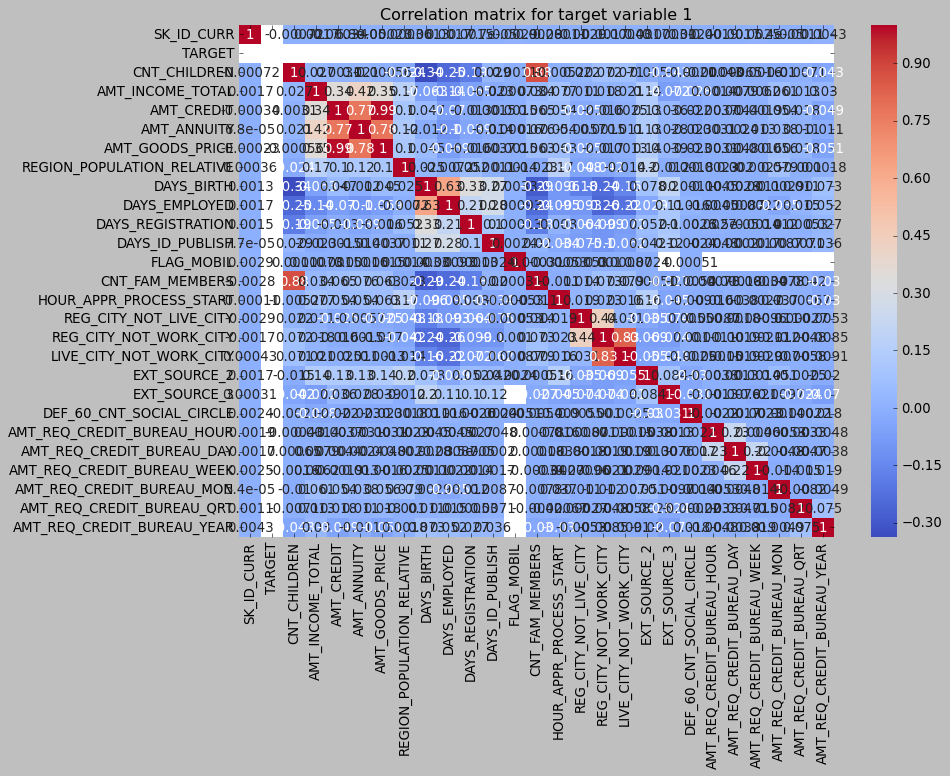

In [281]:
plt.figure(figsize=(12,8)) 
sns.heatmap(corr_0.corr(), annot=True, cmap="coolwarm")
plt.title('Correlation matrix for target variable 1')
plt.show()

In [133]:
#Univariate Analysis
#numerical variables

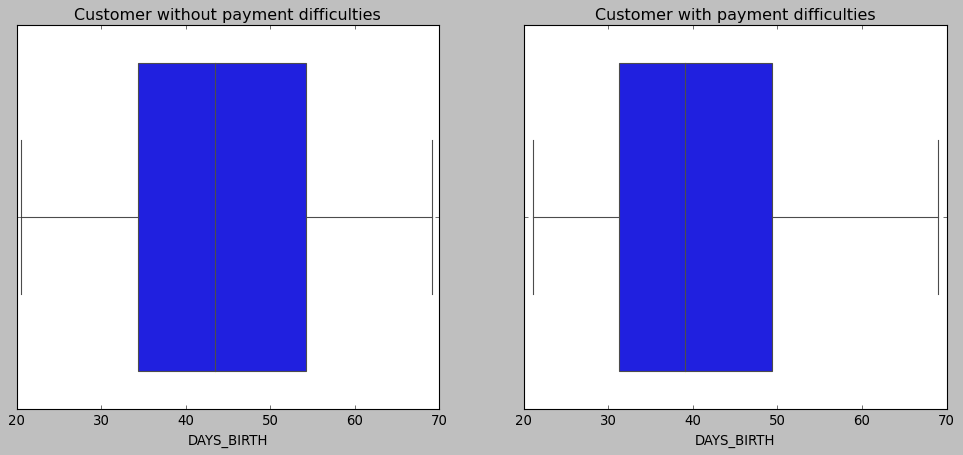

In [134]:
plt.figure(figsize=(15,6)) 

plt.subplot(1,2,1)
ax = sns.boxplot(corr_0['DAYS_BIRTH'])
plt.title('Customer without payment difficulties')

plt.subplot(1,2,2)
ax = sns.boxplot(corr_1['DAYS_BIRTH'])
plt.title('Customer with payment difficulties')
plt.show()

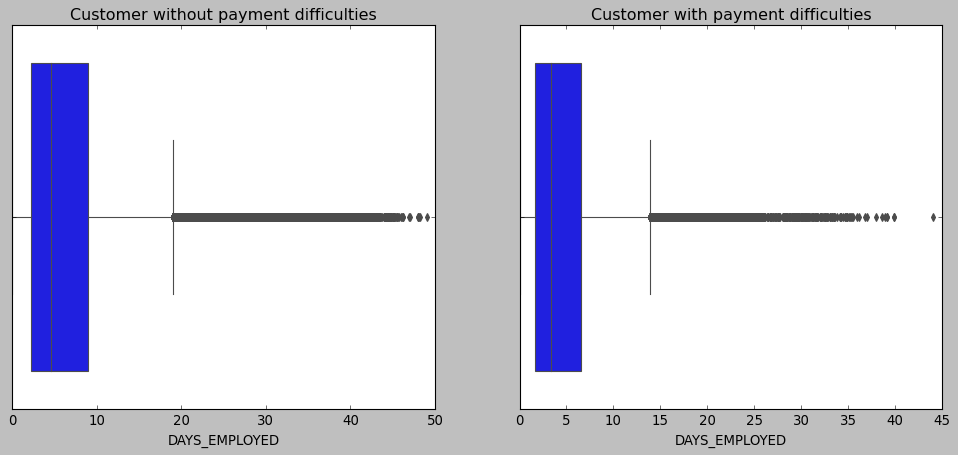

In [135]:
plt.figure(figsize=(15,6)) 

plt.subplot(1,2,1)
ax = sns.boxplot(corr_0[corr_0['DAYS_EMPLOYED']<1000]['DAYS_EMPLOYED'])
plt.title('Customer without payment difficulties')

plt.subplot(1,2,2)
ax = sns.boxplot(corr_1[corr_1['DAYS_EMPLOYED']<1000]['DAYS_EMPLOYED'])
plt.title('Customer with payment difficulties')
plt.show()

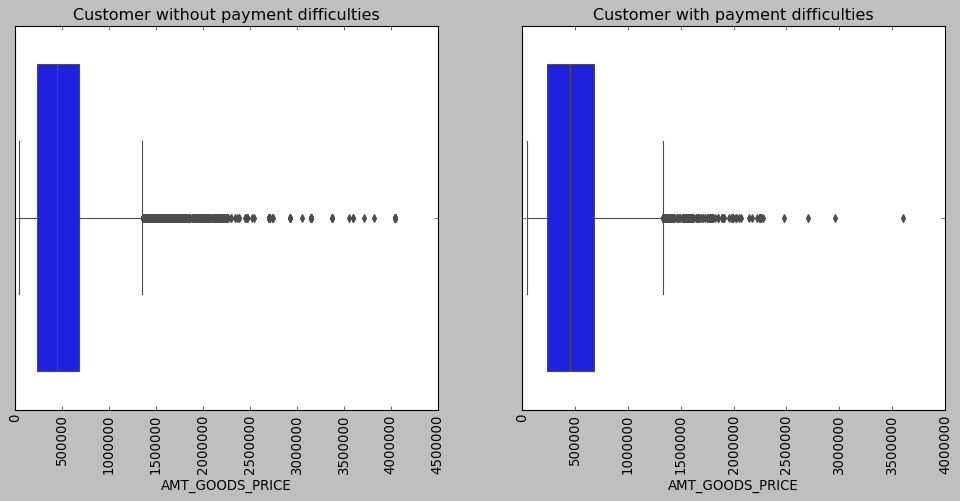

In [306]:
plt.figure(figsize=(15,6)) 

plt.subplot(1,2,1)
ax = sns.boxplot(corr_0['AMT_GOODS_PRICE'])
plt.title('Customer without payment difficulties')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
ax = sns.boxplot(corr_1['AMT_GOODS_PRICE'])
plt.title('Customer with payment difficulties')
plt.xticks(rotation=90)
plt.show()

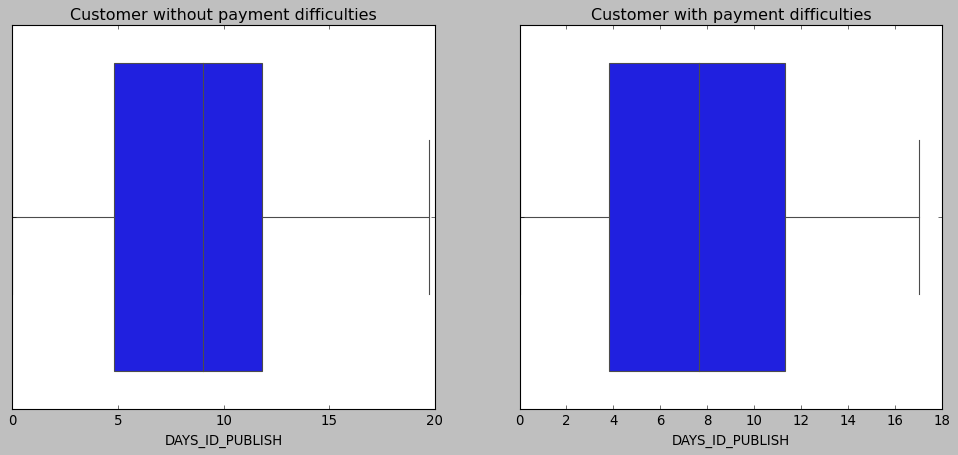

In [137]:
plt.figure(figsize=(15,6)) 

plt.subplot(1,2,1)
ax = sns.boxplot(corr_0['DAYS_ID_PUBLISH'])
plt.title('Customer without payment difficulties')

plt.subplot(1,2,2)
ax = sns.boxplot(corr_1['DAYS_ID_PUBLISH'])
plt.title('Customer with payment difficulties')
plt.show()

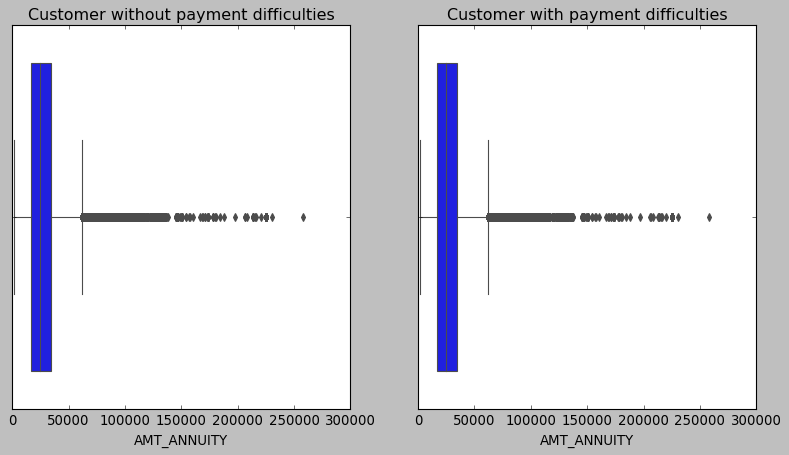

In [138]:
plt.figure(figsize=(12,6)) 

plt.subplot(1,2,1)
ax = sns.boxplot(corr_0['AMT_ANNUITY'])
plt.title('Customer without payment difficulties')

plt.subplot(1,2,2)
ax = sns.boxplot(corr_0['AMT_ANNUITY'])
plt.title('Customer with payment difficulties')
plt.show()

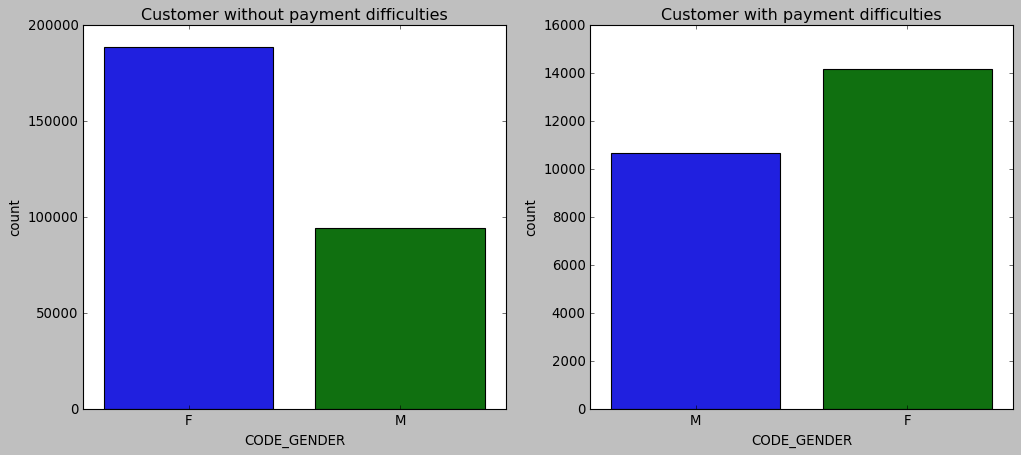

In [139]:
plt.figure(figsize=(15,6)) 

plt.subplot(1,2,1)
ax = sns.countplot(corr_0['CODE_GENDER'])
plt.title('Customer without payment difficulties')

plt.subplot(1,2,2)
ax = sns.countplot(corr_1['CODE_GENDER'])
plt.title('Customer with payment difficulties')
plt.show()

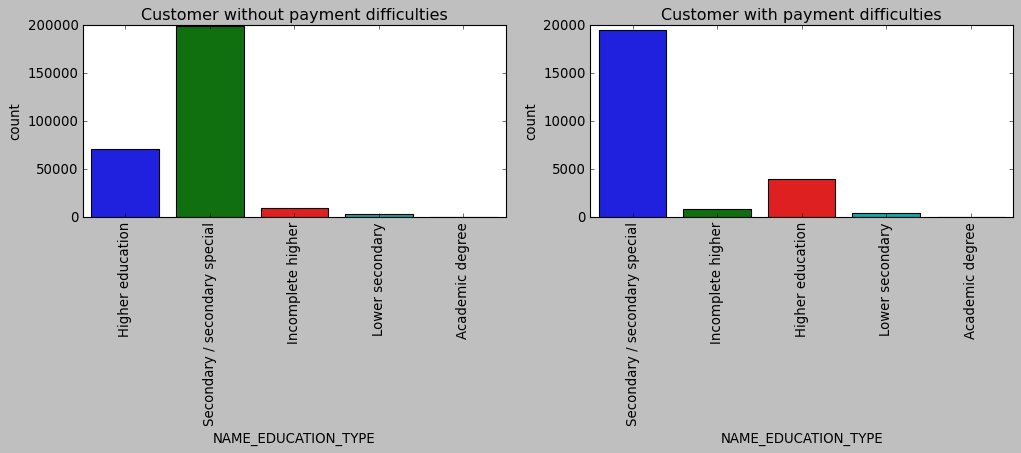

In [290]:
plt.figure(figsize=(15,3)) 

plt.subplot(1,2,1)
ax = sns.countplot(corr_0['NAME_EDUCATION_TYPE'])
plt.title('Customer without payment difficulties')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
ax = sns.countplot(corr_1['NAME_EDUCATION_TYPE'])
plt.title('Customer with payment difficulties')
plt.xticks(rotation=90)
plt.show()

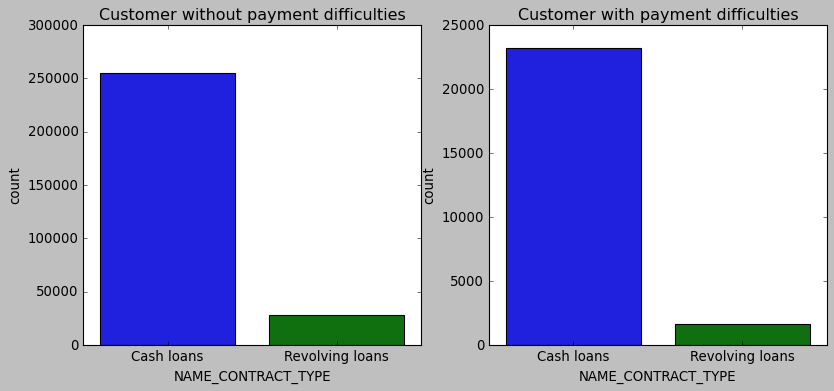

In [141]:
#For Categorical Variables
plt.figure(figsize=(12,5)) 

plt.subplot(1,2,1)
ax = sns.countplot(corr_0['NAME_CONTRACT_TYPE'])
plt.title('Customer without payment difficulties')

plt.subplot(1,2,2)
ax = sns.countplot(corr_1['NAME_CONTRACT_TYPE'])
plt.title('Customer with payment difficulties')
plt.show()

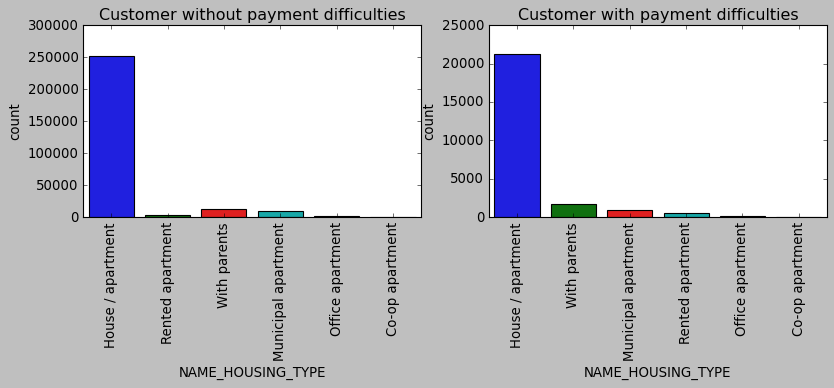

In [291]:
plt.figure(figsize=(12,3)) 

plt.subplot(1,2,1)
ax = sns.countplot(corr_0['NAME_HOUSING_TYPE'])
plt.title('Customer without payment difficulties')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
ax = sns.countplot(corr_1['NAME_HOUSING_TYPE'])
plt.title('Customer with payment difficulties')
plt.xticks(rotation=90)
plt.show()

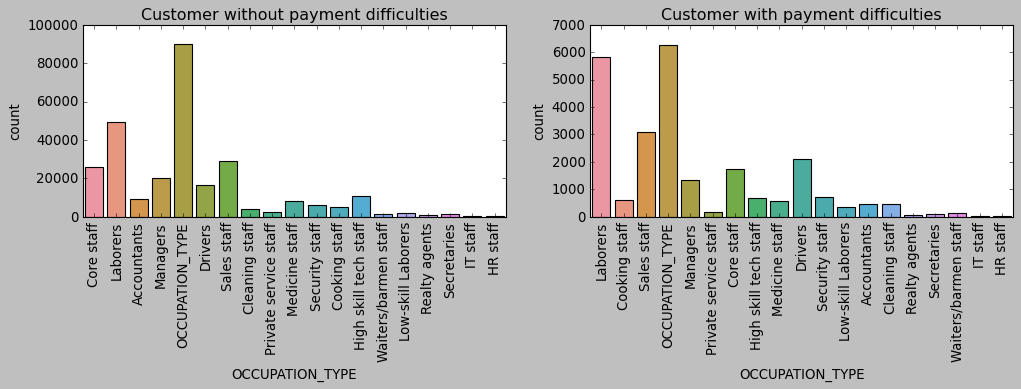

In [292]:
plt.figure(figsize=(15,3)) 

plt.subplot(1,2,1)
ax = sns.countplot(corr_0['OCCUPATION_TYPE'])
plt.title('Customer without payment difficulties')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
ax = sns.countplot(corr_1['OCCUPATION_TYPE'])
plt.title('Customer with payment difficulties')
plt.xticks(rotation=90)
plt.show()

In [144]:
#Bivariate Analysis
#Numerical-Numerical bivariate analysis

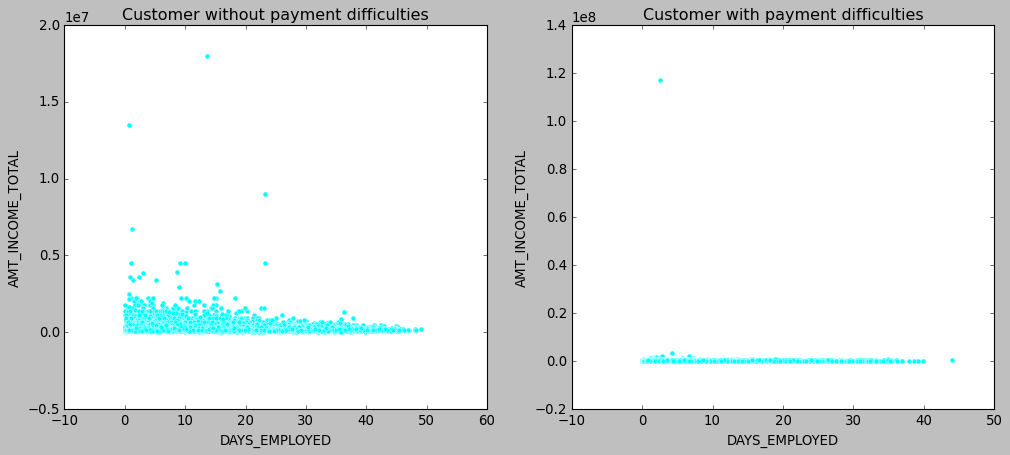

In [145]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
ax = sns.scatterplot(data=corr_0[corr_0['DAYS_EMPLOYED']<1000], x='DAYS_EMPLOYED',y='AMT_INCOME_TOTAL',color='Cyan')
plt.title('Customer without payment difficulties')


plt.subplot(1,2,2)
ax = sns.scatterplot(data=corr_1[corr_1['DAYS_EMPLOYED']<1000], x='DAYS_EMPLOYED',y='AMT_INCOME_TOTAL',color='Cyan')
plt.title('Customer with payment difficulties')
plt.show()

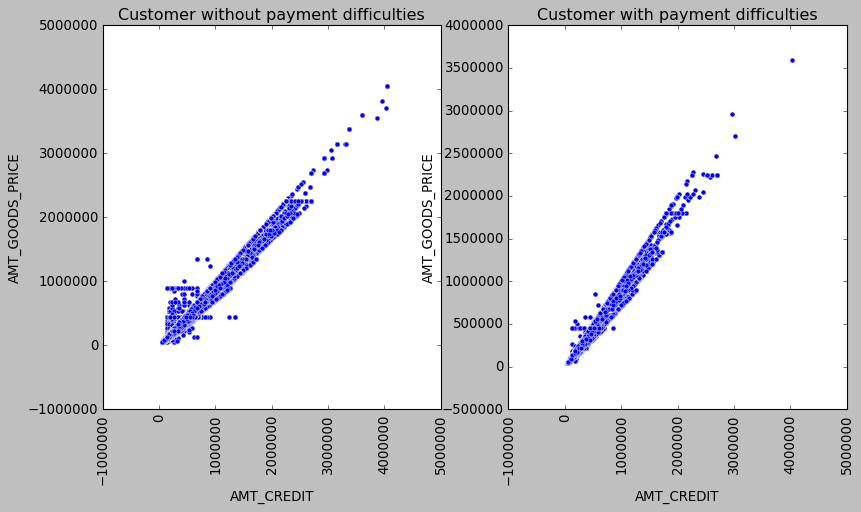

In [295]:
plt.figure(figsize=(12,6)) 

plt.subplot(1,2,1)
ax = sns.scatterplot(data=corr_0,x='AMT_CREDIT',y='AMT_GOODS_PRICE')
plt.title('Customer without payment difficulties')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
ax = sns.scatterplot(data=corr_1,x='AMT_CREDIT',y='AMT_GOODS_PRICE')
plt.title('Customer with payment difficulties')
plt.xticks(rotation=90)
plt.show()

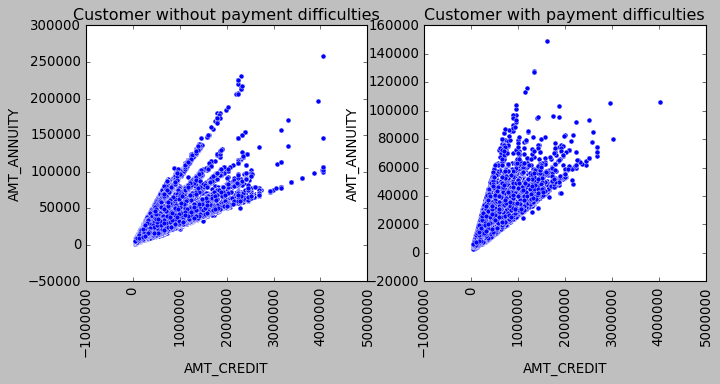

In [296]:
plt.figure(figsize=(10,4)) 

plt.subplot(1,2,1)
ax = sns.scatterplot(data=corr_0,x='AMT_CREDIT',y='AMT_ANNUITY')
plt.title('Customer without payment difficulties')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
ax = sns.scatterplot(data=corr_1,x='AMT_CREDIT',y='AMT_ANNUITY')
plt.title('Customer with payment difficulties')
plt.xticks(rotation=90)
plt.show()

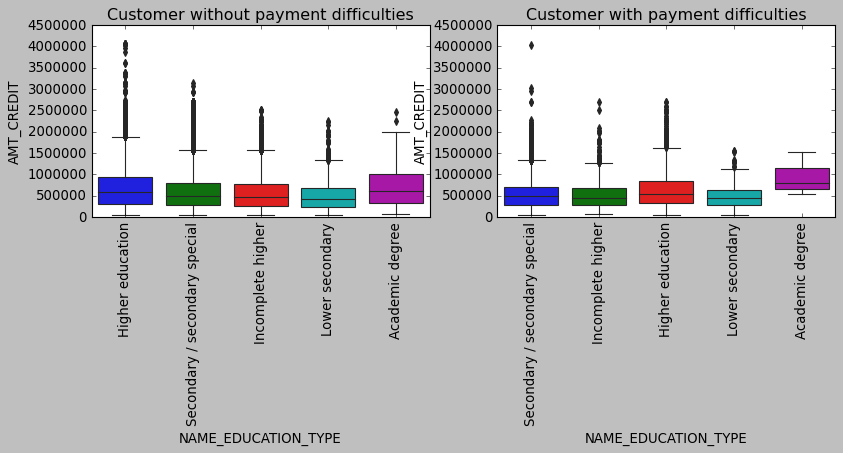

In [298]:
plt.figure(figsize=(12,3)) 

plt.subplot(1,2,1)
ax = sns.boxplot(data=corr_0,y='AMT_CREDIT',x='NAME_EDUCATION_TYPE')
plt.title('Customer without payment difficulties')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
ax = sns.boxplot(data=corr_1,y='AMT_CREDIT',x='NAME_EDUCATION_TYPE')
plt.title('Customer with payment difficulties')
plt.xticks(rotation=90)
plt.show()

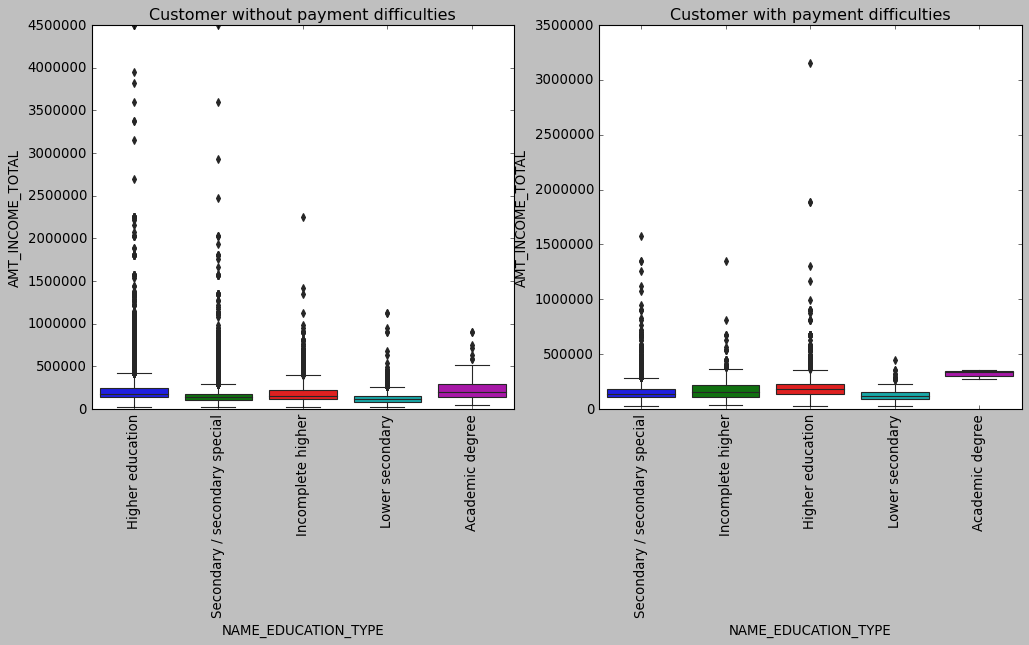

In [149]:
plt.figure(figsize=(15,6)) 

plt.subplot(1,2,1)
ax = sns.boxplot(data=corr_0[corr_0['AMT_INCOME_TOTAL']<5000000],y='AMT_INCOME_TOTAL',x='NAME_EDUCATION_TYPE')
plt.title('Customer without payment difficulties')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
ax = sns.boxplot(data=corr_1[corr_1['AMT_INCOME_TOTAL']<5000000],y='AMT_INCOME_TOTAL',x='NAME_EDUCATION_TYPE')
plt.title('Customer with payment difficulties')
plt.xticks(rotation=90)
plt.show()

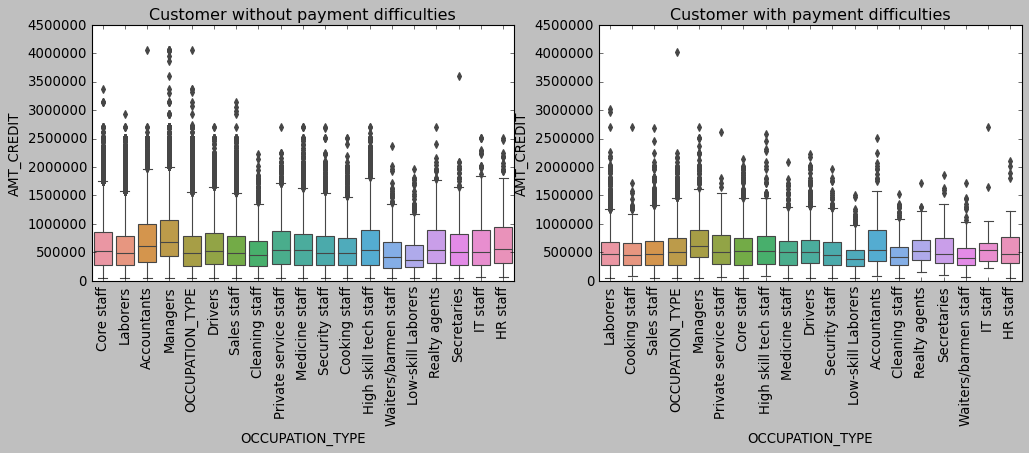

In [299]:
plt.figure(figsize=(15,4)) 

plt.subplot(1,2,1)
ax = sns.boxplot(data=corr_0,y='AMT_CREDIT',x='OCCUPATION_TYPE')
plt.title('Customer without payment difficulties')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
ax = sns.boxplot(data=corr_1,y='AMT_CREDIT',x='OCCUPATION_TYPE')
plt.title('Customer with payment difficulties')
plt.xticks(rotation=90)
plt.show()

In [151]:
##Now will Analise previous_application

In [152]:
#reading the previous_application file

In [153]:
df2=pd.read_csv('previous_application.csv')

In [154]:
df2.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [155]:
df2.shape

(1670214, 37)

In [156]:
df2.info(verbose = True,null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [157]:
df2.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,...,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,...,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,...,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,...,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,...,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,...,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,...,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,...,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,...,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [158]:
#Cleaning the missing data:---
# finding Null Values:

df2.isnull().sum().sort_values(ascending=False)

RATE_INTEREST_PRIVILEGED       1664263
RATE_INTEREST_PRIMARY          1664263
AMT_DOWN_PAYMENT                895844
RATE_DOWN_PAYMENT               895844
NAME_TYPE_SUITE                 820405
NFLAG_INSURED_ON_APPROVAL       673065
DAYS_TERMINATION                673065
DAYS_LAST_DUE                   673065
DAYS_LAST_DUE_1ST_VERSION       673065
DAYS_FIRST_DUE                  673065
DAYS_FIRST_DRAWING              673065
AMT_GOODS_PRICE                 385515
AMT_ANNUITY                     372235
CNT_PAYMENT                     372230
PRODUCT_COMBINATION                346
AMT_CREDIT                           1
NAME_YIELD_GROUP                     0
NAME_PORTFOLIO                       0
NAME_SELLER_INDUSTRY                 0
SELLERPLACE_AREA                     0
CHANNEL_TYPE                         0
NAME_PRODUCT_TYPE                    0
SK_ID_PREV                           0
NAME_GOODS_CATEGORY                  0
NAME_CLIENT_TYPE                     0
CODE_REJECT_REASON       

In [159]:
#more than or equal to 40% NULL values:-
### if a column contains more than 40% of its null values,delete that column
Percentage_of_null_1=(df2.isnull().sum()/len(df2)*100).sort_values(ascending = False).head(60)
Percentage_of_null_1

RATE_INTEREST_PRIVILEGED       99.643698
RATE_INTEREST_PRIMARY          99.643698
AMT_DOWN_PAYMENT               53.636480
RATE_DOWN_PAYMENT              53.636480
NAME_TYPE_SUITE                49.119754
NFLAG_INSURED_ON_APPROVAL      40.298129
DAYS_TERMINATION               40.298129
DAYS_LAST_DUE                  40.298129
DAYS_LAST_DUE_1ST_VERSION      40.298129
DAYS_FIRST_DUE                 40.298129
DAYS_FIRST_DRAWING             40.298129
AMT_GOODS_PRICE                23.081773
AMT_ANNUITY                    22.286665
CNT_PAYMENT                    22.286366
PRODUCT_COMBINATION             0.020716
AMT_CREDIT                      0.000060
NAME_YIELD_GROUP                0.000000
NAME_PORTFOLIO                  0.000000
NAME_SELLER_INDUSTRY            0.000000
SELLERPLACE_AREA                0.000000
CHANNEL_TYPE                    0.000000
NAME_PRODUCT_TYPE               0.000000
SK_ID_PREV                      0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_CLIENT_TYPE

In [160]:
df2.isnull().values.sum()

11109336

In [161]:
#Will drop those values more than 40%
drop_null_1=Percentage_of_null_1[Percentage_of_null_1>=40]

In [162]:
df3=df2.drop(columns=drop_null_1.index)
df3.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,...,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,...,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,...,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,...,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high


In [163]:
Percentage_of_null_1=(df3.isnull().sum()/len(df3)*100).sort_values(ascending = False).head(60)
Percentage_of_null_1

AMT_GOODS_PRICE                23.081773
AMT_ANNUITY                    22.286665
CNT_PAYMENT                    22.286366
PRODUCT_COMBINATION             0.020716
AMT_CREDIT                      0.000060
CODE_REJECT_REASON              0.000000
NAME_YIELD_GROUP                0.000000
NAME_SELLER_INDUSTRY            0.000000
SELLERPLACE_AREA                0.000000
CHANNEL_TYPE                    0.000000
NAME_PRODUCT_TYPE               0.000000
NAME_PORTFOLIO                  0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_CLIENT_TYPE                0.000000
SK_ID_PREV                      0.000000
NAME_PAYMENT_TYPE               0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_STATUS            0.000000
NAME_CASH_LOAN_PURPOSE          0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
HOUR_APPR_PROCESS_START         0.000000
WEEKDAY_APPR_PROCESS_START      0.000000
AMT_APPLICATION                 0.000000
NAME_CONTRACT_TY

In [164]:
##Now will analise below 3 columns:-
#AMT_GOODS_PRICE                23.081773
#AMT_ANNUITY                    22.286665
#CNT_PAYMENT                    22.286366

In [165]:
##OCCUPATION_TYPE column analysis:-
df3['AMT_GOODS_PRICE'].value_counts().head()

45000.0     47831
225000.0    43549
135000.0    40666
450000.0    38926
90000.0     29367
Name: AMT_GOODS_PRICE, dtype: int64

In [166]:
df3['AMT_GOODS_PRICE'].describe()

count    1.284699e+06
mean     2.278473e+05
std      3.153966e+05
min      0.000000e+00
25%      5.084100e+04
50%      1.123200e+05
75%      2.340000e+05
max      6.905160e+06
Name: AMT_GOODS_PRICE, dtype: float64

In [167]:
df3['AMT_GOODS_PRICE'].mode()

0    45000.0
Name: AMT_GOODS_PRICE, dtype: float64

In [168]:
df3['AMT_GOODS_PRICE'].median()

112320.0

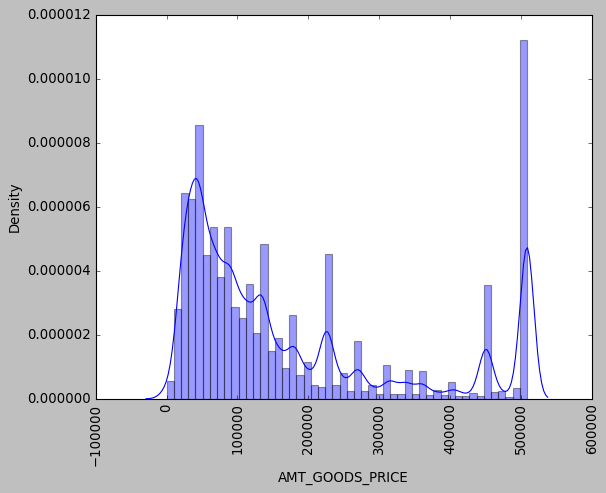

In [307]:
sns.distplot(df3['AMT_GOODS_PRICE'])
plt.xticks(rotation=90)
plt.show()

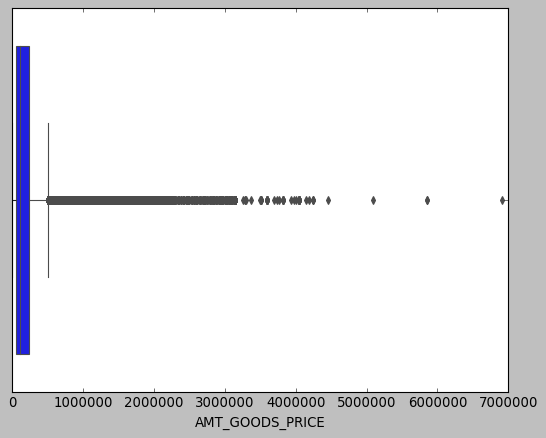

In [170]:
sns.boxplot(df3['AMT_GOODS_PRICE'])
plt.show()

In [171]:
#median and mode differ so much so will leave as it is,will not impute/drop.

In [172]:
#Analysis of AMT_ANNUITY column
#nullable values = 22.29%

df3.AMT_ANNUITY.value_counts().head()

2250.0     31865
11250.0    13974
6750.0     13442
9000.0     12496
22500.0    11903
Name: AMT_ANNUITY, dtype: int64

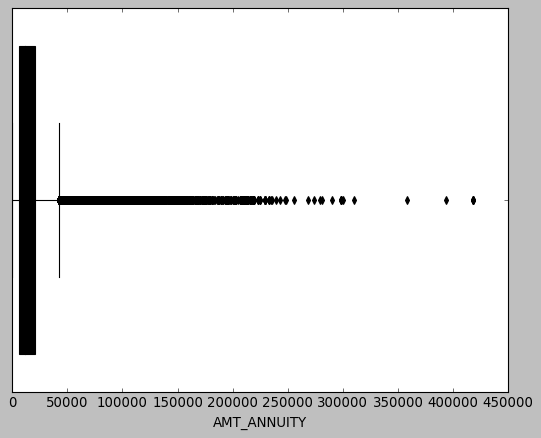

In [173]:
sns.boxplot(df3.AMT_ANNUITY,color='black')
plt.show()

In [174]:
df3.AMT_ANNUITY.describe()

count    1.297979e+06
mean     1.595512e+04
std      1.478214e+04
min      0.000000e+00
25%      6.321780e+03
50%      1.125000e+04
75%      2.065842e+04
max      4.180581e+05
Name: AMT_ANNUITY, dtype: float64

In [175]:
df3.AMT_ANNUITY.mode()

0    2250.0
Name: AMT_ANNUITY, dtype: float64

In [176]:
df3.AMT_ANNUITY.median()

11250.0

In [177]:
#median and mode differ so much so will leave as it is,will not impute/drop.

In [178]:
##Analysis CNT_PAYMENT column
##nullable values = 22.29%

In [179]:
df3.CNT_PAYMENT.value_counts().head()

12.0    323049
6.0     190461
0.0     144985
10.0    141851
24.0    137764
Name: CNT_PAYMENT, dtype: int64

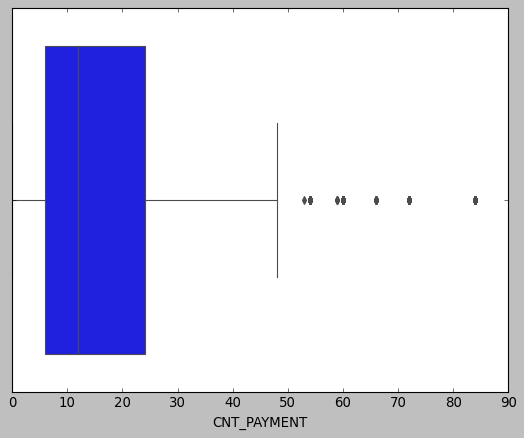

In [180]:
sns.boxplot(df3.CNT_PAYMENT)
plt.show()

In [181]:
df3.CNT_PAYMENT.describe()

count    1.297984e+06
mean     1.605408e+01
std      1.456729e+01
min      0.000000e+00
25%      6.000000e+00
50%      1.200000e+01
75%      2.400000e+01
max      8.400000e+01
Name: CNT_PAYMENT, dtype: float64

In [184]:
df3.CNT_PAYMENT.mode()[0]

12.0

In [185]:
df3.CNT_PAYMENT.median()

12.0

In [186]:
#will keep the data as it is .


In [187]:
##Checking columns with NULL values > 0% and < 1%
#PRODUCT_COMBINATION	346	0.02

In [188]:
df3['PRODUCT_COMBINATION'].value_counts().head()

Cash                           285990
POS household with interest    263622
POS mobile with interest       220670
Cash X-Sell: middle            143883
Cash X-Sell: low               130248
Name: PRODUCT_COMBINATION, dtype: int64

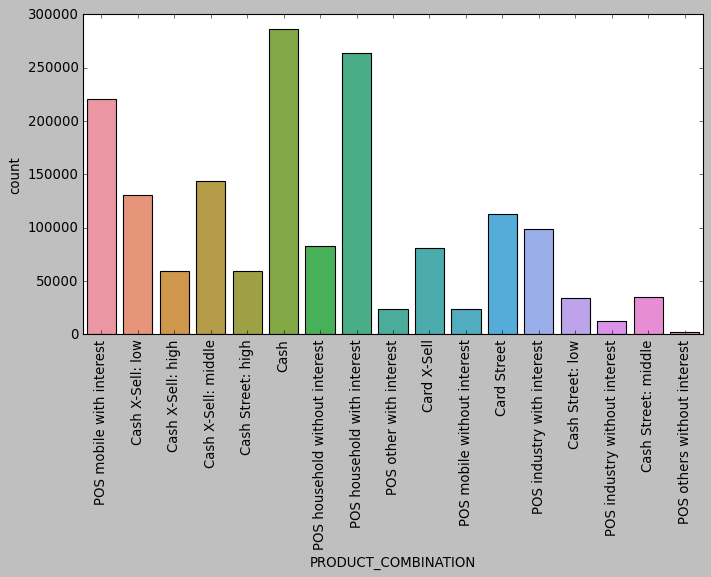

In [189]:
plt.figure(figsize = (10,5))
sns.countplot(data = df3, x = "PRODUCT_COMBINATION")
plt.xticks(rotation = 90)
plt.show()

In [190]:
df3['PRODUCT_COMBINATION'].fillna(value = 'PRODUCT_COMBINATION', inplace = True)

In [191]:
df3['PRODUCT_COMBINATION'].isna().sum()

0

In [192]:
df3.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'],
      dtype='object')

In [193]:
df3.shape

(1670214, 26)

<function matplotlib.pyplot.show(close=None, block=None)>

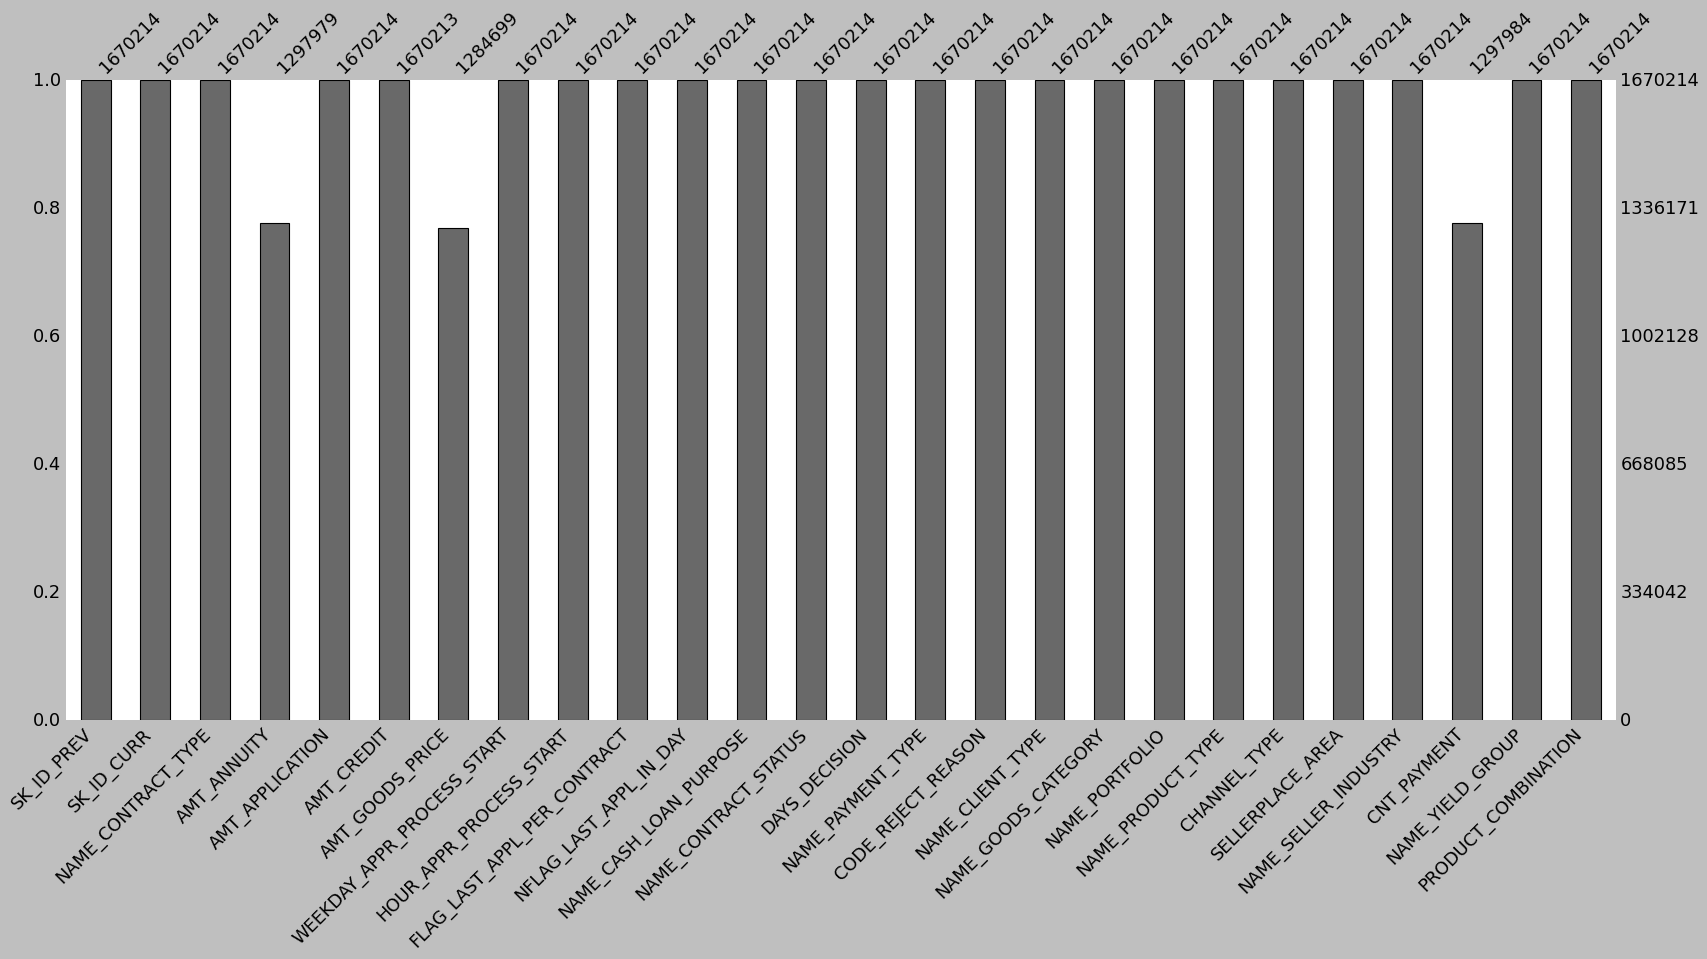

In [282]:
plt.style.use('classic')
mno.bar(df3)
plt.show

In [194]:
## Will devide into two part Structurewaise 
##1-Categorical columns
##2-Numerical cols
list(set(df3.columns) - set(df3.describe().columns))

['NAME_GOODS_CATEGORY',
 'NAME_PRODUCT_TYPE',
 'NAME_CLIENT_TYPE',
 'CHANNEL_TYPE',
 'NAME_CONTRACT_STATUS',
 'NAME_CONTRACT_TYPE',
 'NAME_YIELD_GROUP',
 'NAME_SELLER_INDUSTRY',
 'PRODUCT_COMBINATION',
 'NAME_PORTFOLIO',
 'FLAG_LAST_APPL_PER_CONTRACT',
 'NAME_PAYMENT_TYPE',
 'CODE_REJECT_REASON',
 'WEEKDAY_APPR_PROCESS_START',
 'NAME_CASH_LOAN_PURPOSE']

In [195]:
cat_1=['PRODUCT_COMBINATION',
 'CHANNEL_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'NAME_YIELD_GROUP',
 'NAME_CONTRACT_TYPE',
 'NAME_CLIENT_TYPE',
 'CODE_REJECT_REASON',
 'NAME_CONTRACT_STATUS',
 'NAME_GOODS_CATEGORY',
 'NAME_CASH_LOAN_PURPOSE',
 'NAME_PRODUCT_TYPE',
 'FLAG_LAST_APPL_PER_CONTRACT',
 'NAME_SELLER_INDUSTRY',
 'NAME_PORTFOLIO',
 'NAME_PAYMENT_TYPE']

In [196]:
len(cat_1)

15

In [197]:
# Numerical cols
df3_numeric=df3.describe().columns
df3_numeric

Index(['SK_ID_PREV', 'SK_ID_CURR', 'AMT_ANNUITY', 'AMT_APPLICATION',
       'AMT_CREDIT', 'AMT_GOODS_PRICE', 'HOUR_APPR_PROCESS_START',
       'NFLAG_LAST_APPL_IN_DAY', 'DAYS_DECISION', 'SELLERPLACE_AREA',
       'CNT_PAYMENT'],
      dtype='object')

In [198]:
len(df3_numeric)

11

In [199]:
for i in df3_numeric:
    if df3[i].isnull().mean()>0:
        imp_val=df3[i].mode()
        df3[i]=df3[i].fillna(imp_val)

In [200]:
#Univeriate Analysis:-
##Boxplot method to take care of numeric value outliers:-

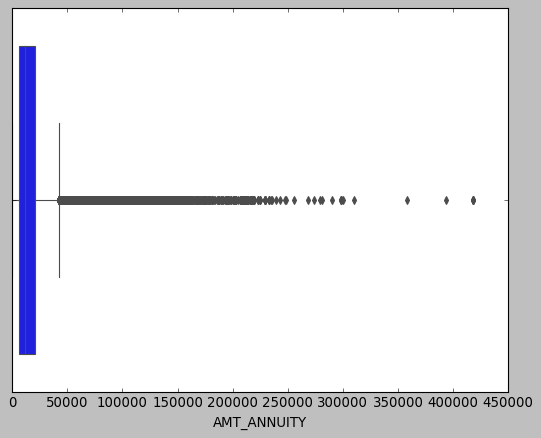

In [201]:
sns.boxplot(df3['AMT_ANNUITY'])
plt.show()

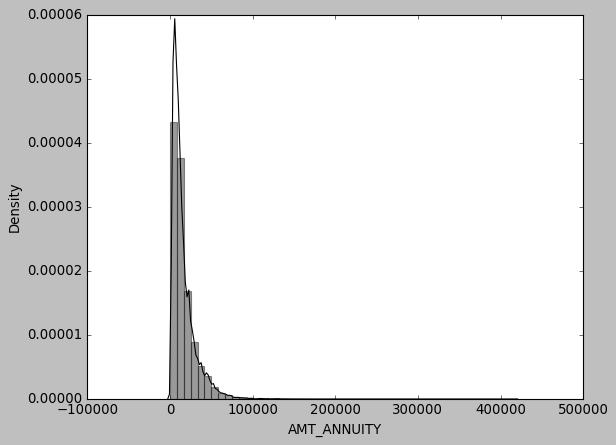

In [202]:
sns.distplot(df3.AMT_ANNUITY,color='black')
plt.show()

In [203]:
df3['AMT_ANNUITY'].describe()

count    1.297979e+06
mean     1.595512e+04
std      1.478214e+04
min      0.000000e+00
25%      6.321780e+03
50%      1.125000e+04
75%      2.065842e+04
max      4.180581e+05
Name: AMT_ANNUITY, dtype: float64

In [204]:
for i in df3_numeric:
    q1=df3[i].describe()['25%']
    q3=df3[i].describe()['75%']
    iqr=q3-q1
    lower_bound=q1-1.5*iqr
    upper_bound=q3+1.5*iqr
    df3[i]=np.where(df3[i]>upper_bound,upper_bound,df3[i])
    df3[i]=np.where(df3[i]<lower_bound,lower_bound,df3[i])

In [205]:
q1 = df3['AMT_ANNUITY'].describe()['25%']
q3 = df3['AMT_ANNUITY'].describe()['75%']
IQR = q3 - q1
print(IQR)
lower_bound=q1-1.5*iqr
upper_bound=q3+1.5*iqr
lower_bound_outlier=np.where(df3['AMT_ANNUITY']>upper_bound,upper_bound,df3['AMT_ANNUITY'])
upper_bound_outlier=np.where(df3['AMT_ANNUITY']<lower_bound,lower_bound,df3['AMT_ANNUITY'])
upper_bound_outlier

14336.64


array([ 6294.78 , 25188.615, 15060.735, ..., 11520.855, 18821.52 ,
       16431.3  ])

In [206]:
#Analysis of AMT_APPLICATION column

In [207]:
df3['AMT_APPLICATION'].value_counts().head()

0.0         392402
422820.0    208020
45000.0      47831
225000.0     43543
135000.0     40678
Name: AMT_APPLICATION, dtype: int64

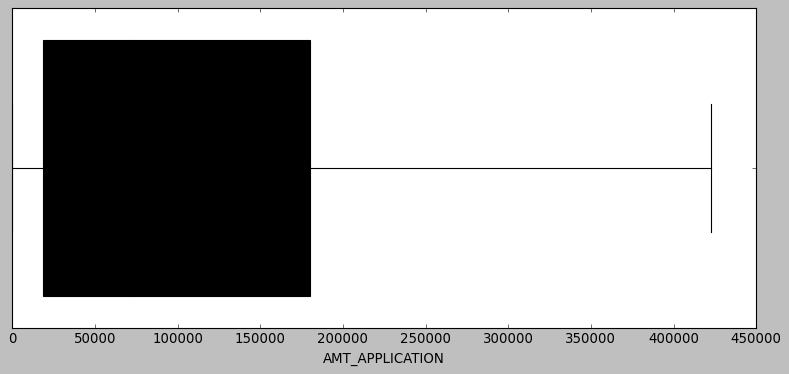

In [208]:
plt.figure(figsize=[12,5])
sns.boxplot(df3.AMT_APPLICATION,color='black')
plt.show()

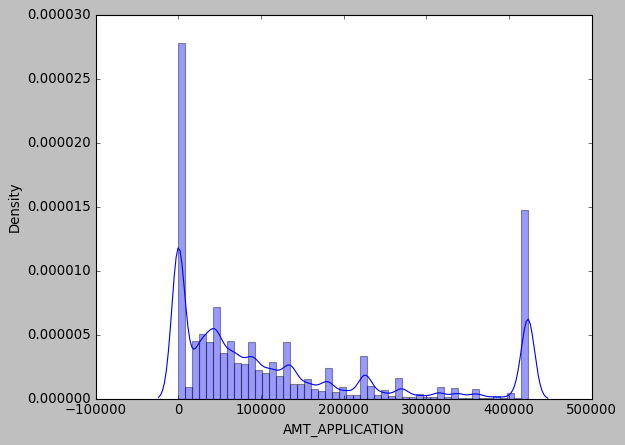

In [209]:
sns.distplot(df3.AMT_APPLICATION)
plt.show()

In [210]:
q1 = df3['AMT_APPLICATION'].describe()['25%']
q3 = df3['AMT_APPLICATION'].describe()['75%']
IQR = q3 - q1
print(IQR)
lower_bound=q1-1.5*iqr
upper_bound=q3+1.5*iqr
lower_bound_outlier=np.where(df3['AMT_APPLICATION']>upper_bound,upper_bound,df3['AMT_APPLICATION'])
upper_bound_outlier=np.where(df3['AMT_APPLICATION']<lower_bound,lower_bound,df3['AMT_APPLICATION'])
upper_bound_outlier

161640.0


array([ 18693., 422820., 112500., ..., 105237., 180000., 360000.])

In [211]:
##Note:---AMT_APPLICATION values above 422820.0 are outliers

In [212]:
#Analysis of AMT_CREDIT column

In [213]:
df3['AMT_CREDIT'].value_counts().head()

0.0         336768
504805.5    179990
45000.0      35051
225000.0     21094
450000.0     19954
Name: AMT_CREDIT, dtype: int64

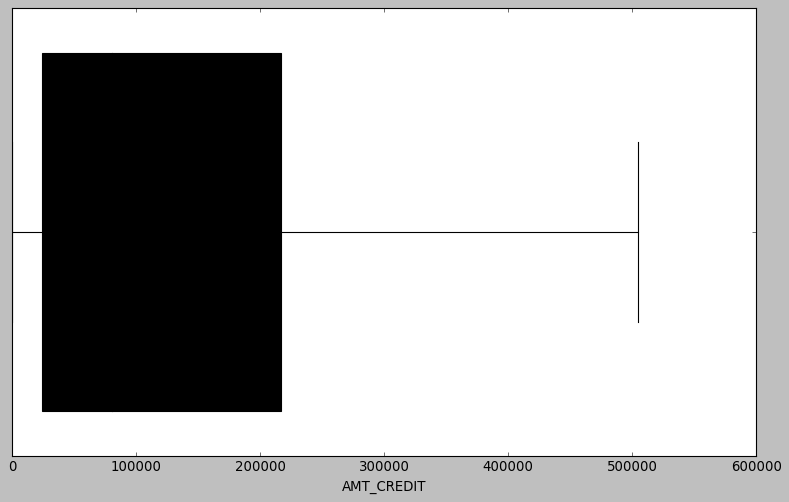

In [214]:
plt.figure(figsize=[12,7])
sns.boxplot(df3.AMT_CREDIT,color='black')
plt.show()

In [215]:
q1 = df3['AMT_CREDIT'].describe()['25%']
q3 = df3['AMT_CREDIT'].describe()['75%']
IQR = q3 - q1
print(IQR)
lower_bound=q1-1.5*iqr
upper_bound=q3+1.5*iqr
lower_bound_outlier=np.where(df3['AMT_CREDIT']>upper_bound,upper_bound,df3['AMT_CREDIT'])
upper_bound_outlier=np.where(df3['AMT_CREDIT']<lower_bound,lower_bound,df3['AMT_CREDIT'])
lower_bound_outlier
upper_bound_outlier

192258.0


array([ 24133.5, 504805.5, 136444.5, ..., 102523.5, 191880. , 360000. ])

In [216]:
#above 504805.5 are outliers

In [217]:
df3['DAYS_DECISION'].value_counts()

-2830.0    17755
-245.0      2444
-238.0      2390
-210.0      2375
-273.0      2350
           ...  
-2829.0      176
-2777.0      176
-2811.0      175
-2080.0      175
-1.0           2
Name: DAYS_DECISION, Length: 2830, dtype: int64

In [218]:
df3['DAYS_DECISION'].nunique()

2830

In [219]:
##Converting DAYS_DECISION to positive 
Convert_negative_to_positive_1 =['DAYS_DECISION']
df3[Convert_negative_to_positive_1] = df3[Convert_negative_to_positive_1].abs()

In [220]:
df3['DAYS_DECISION'].value_counts().head()

2830.0    17755
245.0      2444
238.0      2390
210.0      2375
273.0      2350
Name: DAYS_DECISION, dtype: int64

In [221]:
##Analysis of NAME_PAYMENT_TYPE column:-
df3['NAME_PAYMENT_TYPE'].value_counts(normalize = True)

Cash through the bank                        0.618814
XNA                                          0.375631
Non-cash from your account                   0.004905
Cashless from the account of the employer    0.000650
Name: NAME_PAYMENT_TYPE, dtype: float64

In [222]:
#Analysis of CODE_REJECT_REASON column
df3['CODE_REJECT_REASON'].value_counts(normalize = True)

XAP       0.810132
HC        0.104915
LIMIT     0.033337
SCO       0.022432
CLIENT    0.015828
SCOFR     0.007670
XNA       0.003140
VERIF     0.002116
SYSTEM    0.000429
Name: CODE_REJECT_REASON, dtype: float64

In [223]:
##Merge datasets df1 and df3 into df_merge

In [224]:
df3.shape

(1670214, 26)

In [225]:
df3.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'],
      dtype='object')

In [226]:
#merge_data=pd.merge(df1,df3,on=['SK_ID_CURR','TARGET'])
merge_data=pd.merge(df1[['SK_ID_CURR','TARGET']],df3,how='left',on=['SK_ID_CURR'])
merge_data

,SK_ID_CURR,TARGET,SK_ID_PREV,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100002,1,1038818.0,Consumer loans,9251.775,179055.0,179055.0,179055.0,SATURDAY,9.0,...,New,Vehicles,POS,XNA,Stone,206.5,Auto technology,24.0,low_normal,POS other with interest
1,100003,0,1810518.0,Cash loans,42163.380,422820.0,504805.5,508738.5,FRIDAY,12.0,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1.0,XNA,12.0,low_normal,Cash X-Sell: low
2,100003,0,2636178.0,Consumer loans,42163.380,337500.0,348637.5,337500.0,SUNDAY,17.0,...,Refreshed,Furniture,POS,XNA,Stone,206.5,Furniture,6.0,middle,POS industry with interest
3,100003,0,2396755.0,Consumer loans,6737.310,68809.5,68053.5,68809.5,SATURDAY,15.0,...,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200.0,Consumer electronics,12.0,middle,POS household with interest
4,100004,0,1564014.0,Consumer loans,5357.250,24282.0,20106.0,24282.0,FRIDAY,5.0,...,New,Mobile,POS,XNA,Regional / Local,30.0,Connectivity,4.0,middle,POS mobile without interest
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1430150,456255,0,2073384.0,Cash loans,16400.610,229500.0,254340.0,229500.0,THURSDAY,12.0,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1.0,XNA,24.0,middle,Cash X-Sell: middle
1430151,456255,0,1708056.0,Revolving loans,2250.000,45000.0,45000.0,45000.0,SUNDAY,14.0,...,Repeater,XNA,Cards,walk-in,Country-wide,20.0,Connectivity,0.0,XNA,Card Street
1430152,456255,0,1296007.0,Cash loans,30737.655,422820.0,504805.5,508738.5,FRIDAY,14.0,...,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1.0,XNA,51.0,low_normal,Cash Street: low
1430153,456255,0,2631384.0,Cash loans,42163.380,422820.0,504805.5,508738.5,FRIDAY,14.0,...,Repeater,XNA,Cash,x-sell,AP+ (Cash loan),6.0,XNA,36.0,low_normal,Cash X-Sell: low


In [227]:
merge_data.describe()

,SK_ID_CURR,TARGET,SK_ID_PREV,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT
count,1.430155e+06,1.430155e+06,1.413701e+06,1.106483e+06,1.413701e+06,1.413700e+06,1.094176e+06,1.413701e+06,1413701.0,1.413701e+06,1.413701e+06,1.106488e+06
mean,2.784702e+05,8.624240e-02,1.922744e+06,1.487562e+04,1.264962e+05,1.474592e+05,1.746722e+05,1.247956e+01,1.0,8.799014e+02,5.367690e+01,1.567138e+01
std,1.028021e+05,2.807218e-01,5.327153e+05,1.138343e+04,1.403820e+05,1.656516e+05,1.612894e+05,3.329100e+00,0.0,7.823623e+02,7.825194e+01,1.349038e+01
min,1.000020e+05,0.000000e+00,1.000001e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.500000e+00,1.0,1.000000e+00,-1.000000e+00,0.000000e+00
25%,1.893610e+05,0.000000e+00,1.461346e+06,6.257858e+03,1.975050e+04,2.488050e+04,4.982850e+04,1.000000e+01,1.0,2.710000e+02,-1.000000e+00,6.000000e+00
50%,2.789560e+05,0.000000e+00,1.922698e+06,1.122376e+04,7.087050e+04,8.059500e+04,1.102455e+05,1.200000e+01,1.0,5.820000e+02,4.000000e+00,1.200000e+01
75%,3.675090e+05,0.000000e+00,2.384012e+06,2.042078e+04,1.800000e+05,2.156400e+05,2.295000e+05,1.500000e+01,1.0,1.313000e+03,8.500000e+01,2.400000e+01
max,4.562550e+05,1.000000e+00,2.845381e+06,4.216338e+04,4.228200e+05,5.048055e+05,5.087385e+05,2.250000e+01,1.0,2.830000e+03,2.065000e+02,5.100000e+01


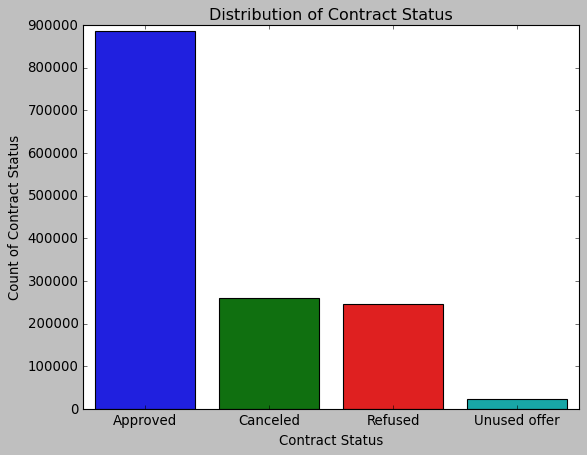

In [228]:
sns.countplot(merge_data['NAME_CONTRACT_STATUS'])
plt.xlabel("Contract Status")
plt.ylabel("Count of Contract Status")
plt.title("Distribution of Contract Status")
plt.show()

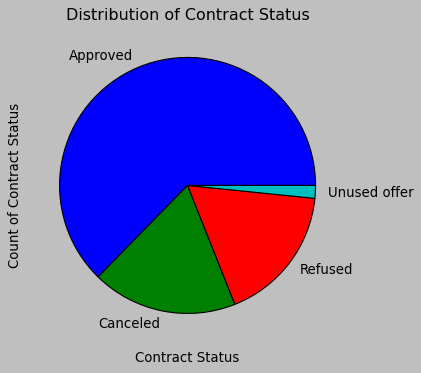

In [229]:
plt.figure(figsize = (13,5))
merge_data["NAME_CONTRACT_STATUS"].value_counts().plot.pie()
plt.xlabel("Contract Status")
plt.ylabel("Count of Contract Status")
plt.title("Distribution of Contract Status")
plt.show()

In [239]:
approved_df = merge_data[merge_data['NAME_CONTRACT_STATUS']=='Approved']
refused_df = merge_data[merge_data['NAME_CONTRACT_STATUS']=='Refused']
canceled_df = merge_data[merge_data['NAME_CONTRACT_STATUS']=='Canceled']
unused_df = merge_data[merge_data['NAME_CONTRACT_STATUS']=='Unused offer']

<Figure size 160x80 with 0 Axes>

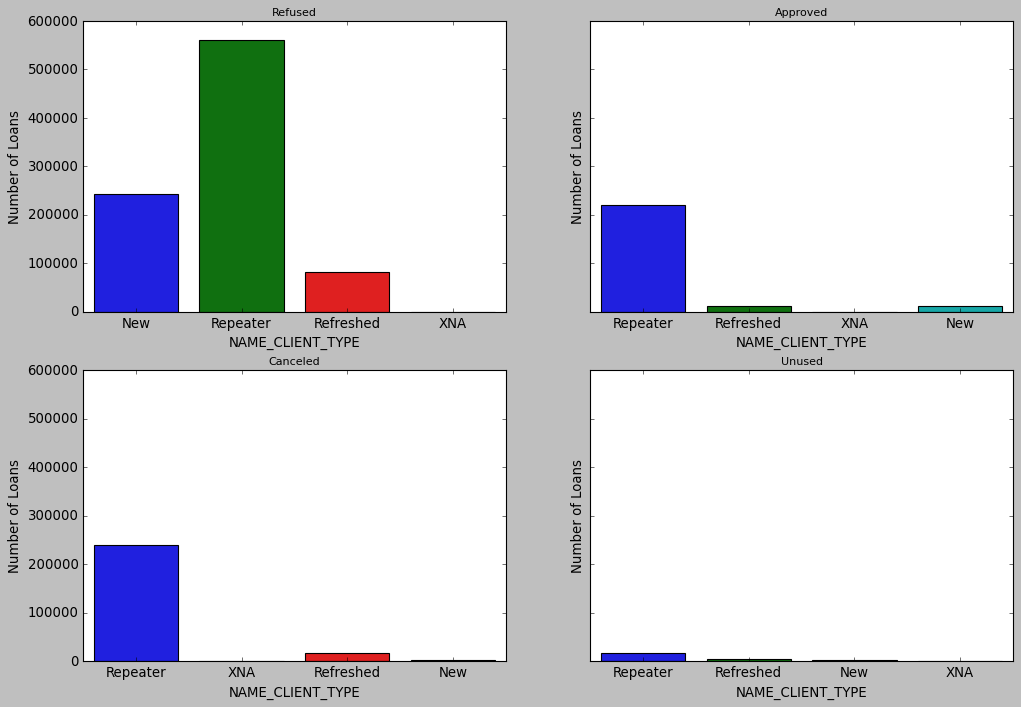

In [303]:
plt.figure(figsize = (2,1))
fig, ((x1, x2), (y1, y2)) = plt.subplots(nrows=2,ncols=2, figsize=(15,10),sharey=True)

x1 = sns.countplot(ax=x1,data=approved_df,x='NAME_CLIENT_TYPE')
x1.set_title("Refused", fontsize=10)
x1.set_xlabel('NAME_CLIENT_TYPE')
x1.set_ylabel("Number of Loans")

x2 = sns.countplot(ax=x2,data=refused_df,x='NAME_CLIENT_TYPE')
x2.set_title("Approved", fontsize=10)
x2.set_xlabel('NAME_CLIENT_TYPE')
x2.set_ylabel("Number of Loans")

y1 = sns.countplot(ax=y1,data=canceled_df,x='NAME_CLIENT_TYPE')
y1.set_title("Canceled", fontsize=10)
y1.set_xlabel('NAME_CLIENT_TYPE')
y1.set_ylabel("Number of Loans")

y2 = sns.countplot(ax=y2,data=unused_df,x='NAME_CLIENT_TYPE')
y2.set_title("Unused", fontsize=10)
y2.set_xlabel('NAME_CLIENT_TYPE')
y2.set_ylabel("Number of Loans")

plt.show()

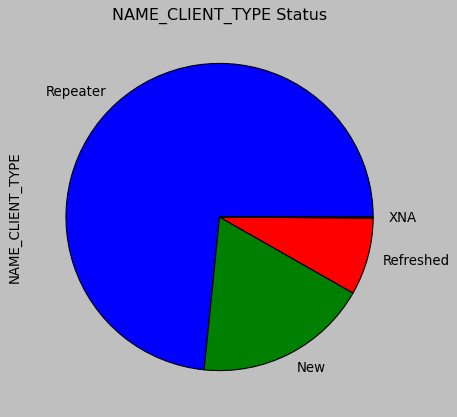

In [268]:
plt.figure(figsize = (15,6))
merge_data["NAME_CLIENT_TYPE"].value_counts().plot.pie()
plt.title("NAME_CLIENT_TYPE Status")
plt.show()

<Figure size 160x80 with 0 Axes>

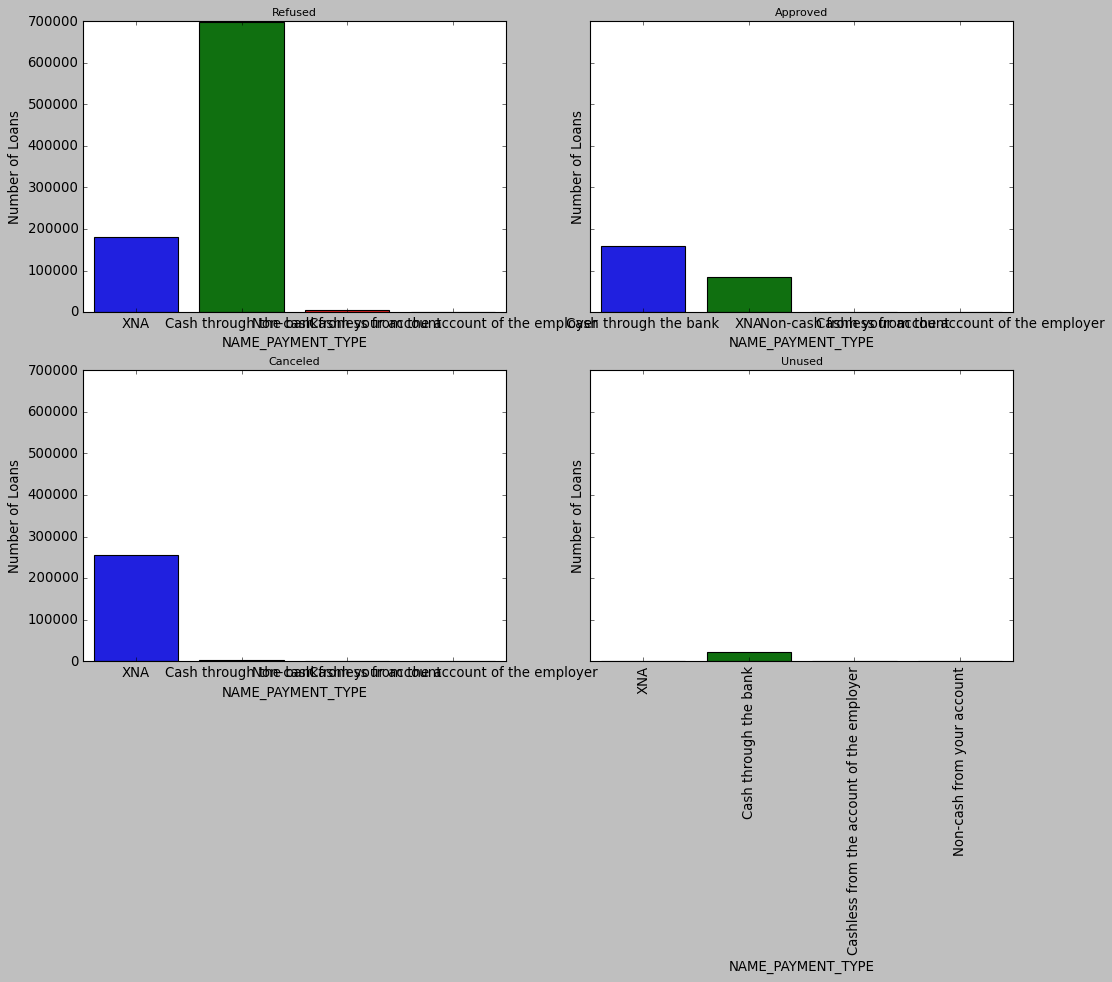

In [305]:
plt.figure(figsize = (2,1))
fig, ((x1, x2), (y1, y2)) = plt.subplots(nrows=2,ncols=2, figsize=(15,10),sharey=True)

x1 = sns.countplot(ax=x1,data=approved_df,x='NAME_PAYMENT_TYPE')
x1.set_title("Refused", fontsize=10)
x1.set_xlabel('NAME_PAYMENT_TYPE')
x1.set_ylabel("Number of Loans")
plt.xticks(rotation=90)

x2 = sns.countplot(ax=x2,data=refused_df,x='NAME_PAYMENT_TYPE')
x2.set_title("Approved", fontsize=10)
x2.set_xlabel('NAME_PAYMENT_TYPE')
x2.set_ylabel("Number of Loans")
plt.xticks(rotation=90)

y1 = sns.countplot(ax=y1,data=canceled_df,x='NAME_PAYMENT_TYPE')
y1.set_title("Canceled", fontsize=10)
y1.set_xlabel('NAME_PAYMENT_TYPE')
y1.set_ylabel("Number of Loans")
plt.xticks(rotation=90)

y2 = sns.countplot(ax=y2,data=unused_df,x='NAME_PAYMENT_TYPE')
y2.set_title("Unused", fontsize=10)
y2.set_xlabel('NAME_PAYMENT_TYPE')
y2.set_ylabel("Number of Loans")
plt.xticks(rotation=90)

plt.show()

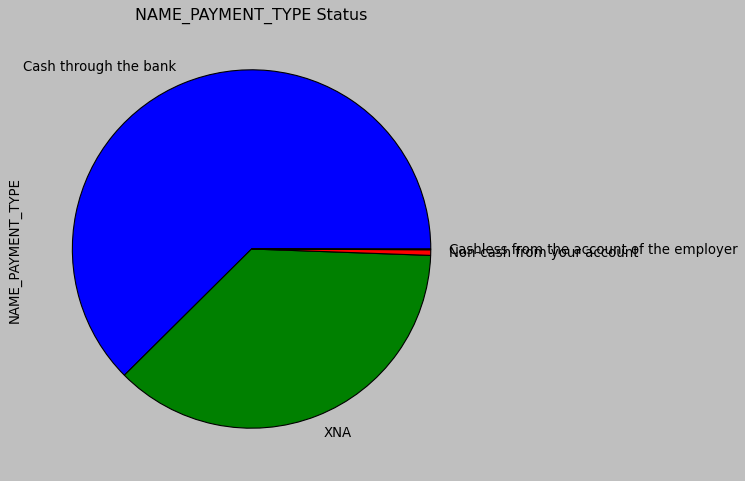

In [270]:
plt.figure(figsize = (20,7))
merge_data["NAME_PAYMENT_TYPE"].value_counts().plot.pie()
plt.title("NAME_PAYMENT_TYPE Status")
plt.show()

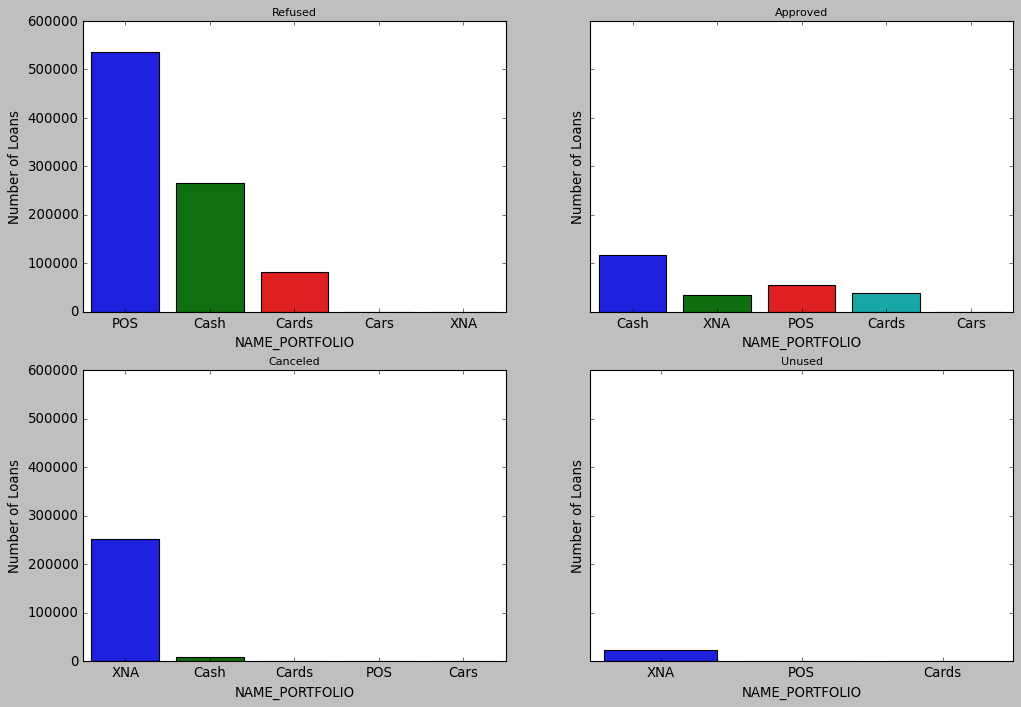

In [271]:
fig, ((x1, x2), (y1, y2)) = plt.subplots(nrows=2,ncols=2, figsize=(15,10),sharey=True)

x1 = sns.countplot(ax=x1,data=approved_df,x='NAME_PORTFOLIO')
x1.set_title("Refused", fontsize=10)
x1.set_xlabel('NAME_PORTFOLIO')
x1.set_ylabel("Number of Loans")

x2 = sns.countplot(ax=x2,data=refused_df,x='NAME_PORTFOLIO')
x2.set_title("Approved", fontsize=10)
x2.set_xlabel('NAME_PORTFOLIO')
x2.set_ylabel("Number of Loans")

y1 = sns.countplot(ax=y1,data=canceled_df,x='NAME_PORTFOLIO')
y1.set_title("Canceled", fontsize=10)
y1.set_xlabel('NAME_PORTFOLIO')
y1.set_ylabel("Number of Loans")

y2 = sns.countplot(ax=y2,data=unused_df,x='NAME_PORTFOLIO')
y2.set_title("Unused", fontsize=10)
y2.set_xlabel('NAME_PORTFOLIO')
y2.set_ylabel("Number of Loans")

plt.show()

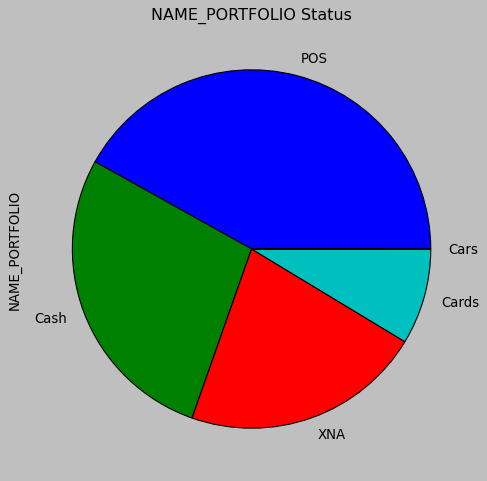

In [272]:
plt.figure(figsize = (20,7))
merge_data["NAME_PORTFOLIO"].value_counts().plot.pie()
plt.title("NAME_PORTFOLIO Status")
plt.show()

<Figure size 1600x560 with 0 Axes>

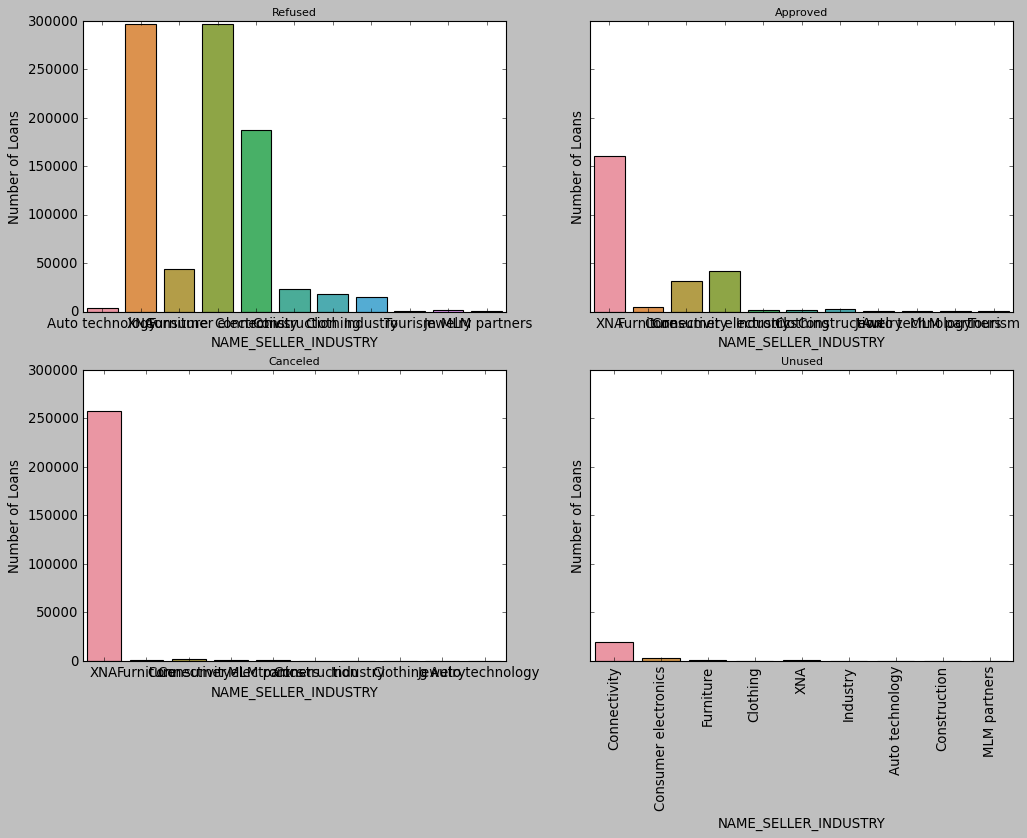

In [279]:
plt.figure(figsize = (20,7))

fig, ((x1, x2), (y1, y2)) = plt.subplots(nrows=2,ncols=2, figsize=(15,10),sharey=True)
plt.xticks(rotation=90)

x1 = sns.countplot(ax=x1,data=approved_df,x='NAME_SELLER_INDUSTRY')
x1.set_title("Refused", fontsize=10)
x1.set_xlabel('NAME_SELLER_INDUSTRY')
x1.set_ylabel("Number of Loans")
plt.xticks(rotation=90)

x2 = sns.countplot(ax=x2,data=refused_df,x='NAME_SELLER_INDUSTRY')
x2.set_title("Approved", fontsize=10)
x2.set_xlabel('NAME_SELLER_INDUSTRY')
x2.set_ylabel("Number of Loans")
plt.xticks(rotation=90)

y1 = sns.countplot(ax=y1,data=canceled_df,x='NAME_SELLER_INDUSTRY')
y1.set_title("Canceled", fontsize=10)
y1.set_xlabel('NAME_SELLER_INDUSTRY')
y1.set_ylabel("Number of Loans")
plt.xticks(rotation=90)

y2 = sns.countplot(ax=y2,data=unused_df,x='NAME_SELLER_INDUSTRY')
y2.set_title("Unused", fontsize=10)
y2.set_xlabel('NAME_SELLER_INDUSTRY')
y2.set_ylabel("Number of Loans")


plt.xticks(rotation=90)
plt.show()

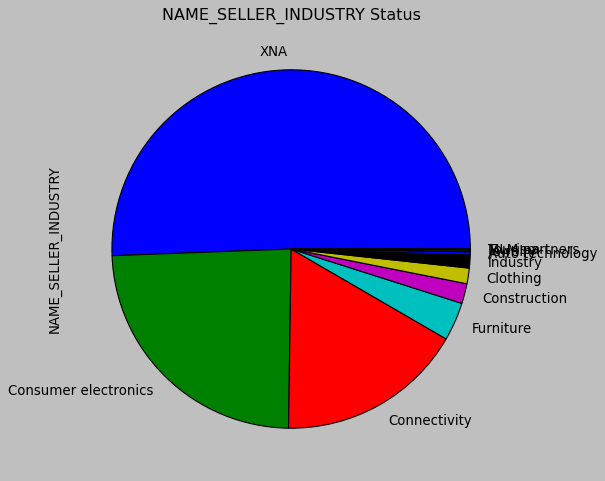

In [274]:
plt.figure(figsize = (20,7))
merge_data["NAME_SELLER_INDUSTRY"].value_counts().plot.pie()
plt.title("NAME_SELLER_INDUSTRY Status")
plt.show()

In [ ]:
#CONCLUSION
#Note-Here above we observed:-
# NAME_CONTRACT_STATUS , approval loan rate is more
# NAME_PAYMENT_TYPE , Refused Lone is High
# NAME_PORTFOLIO , Approval Loan in Cash. 
# NAME_SELLER_INDUSTRY , Clothing and consumer electronics refuse rate is more.